**Student Name:** Pradip Thapa<br/>
**Student Id:** 230195578<br/>

# **Importing Libraries**

In [ ]:
# Data handling
import pandas as pd
import numpy as np
# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
# Preprocessing
from sklearn.preprocessing import StandardScaler
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Explainability
import shap
import random
import torch

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
# using PyTorch (Pipeline B.1)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# **Pipeline A: ML on Structured Clinical Data (FHS Dataset)**

# **DataSet Exploration**

In [ ]:
# Load Framingham dataset
df_fhs = pd.read_csv('framingham.csv')

# Preview data
df_fhs.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Check column types
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
#Descriptive Statistics
df_fhs.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Check for missing values
df_fhs.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
#Handle Missing Values
# Fill missing values with median (robust method)
df_fhs.fillna(df_fhs.median(), inplace=True)

In [ ]:
# Check for missing values after handling
df_fhs.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
#Define Features and Target
# Define target column
target = 'TenYearCHD'

# Define feature matrix (X) and target vector (y)
X_fhs = df_fhs.drop(columns=[target])
y_fhs = df_fhs[target]

In [ ]:
#Feature Scaling
scaler_fhs = StandardScaler()
X_fhs_scaled = scaler_fhs.fit_transform(X_fhs)

# **Data Visualization**

/tmp/ipython-input-10-896503571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fhs, x='TenYearCHD', palette='Set2')


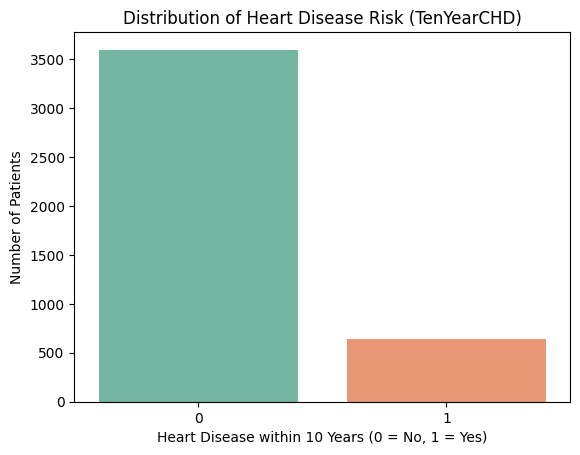

TenYearCHD
0    3596
1     644
Name: count, dtype: int64


In [ ]:
#Plot Target Variable Distribution
# Plot class balance
sns.countplot(data=df_fhs, x='TenYearCHD', palette='Set2')
plt.title('Distribution of Heart Disease Risk (TenYearCHD)')
plt.xlabel('Heart Disease within 10 Years (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()

# Also print the counts
print(df_fhs['TenYearCHD'].value_counts())

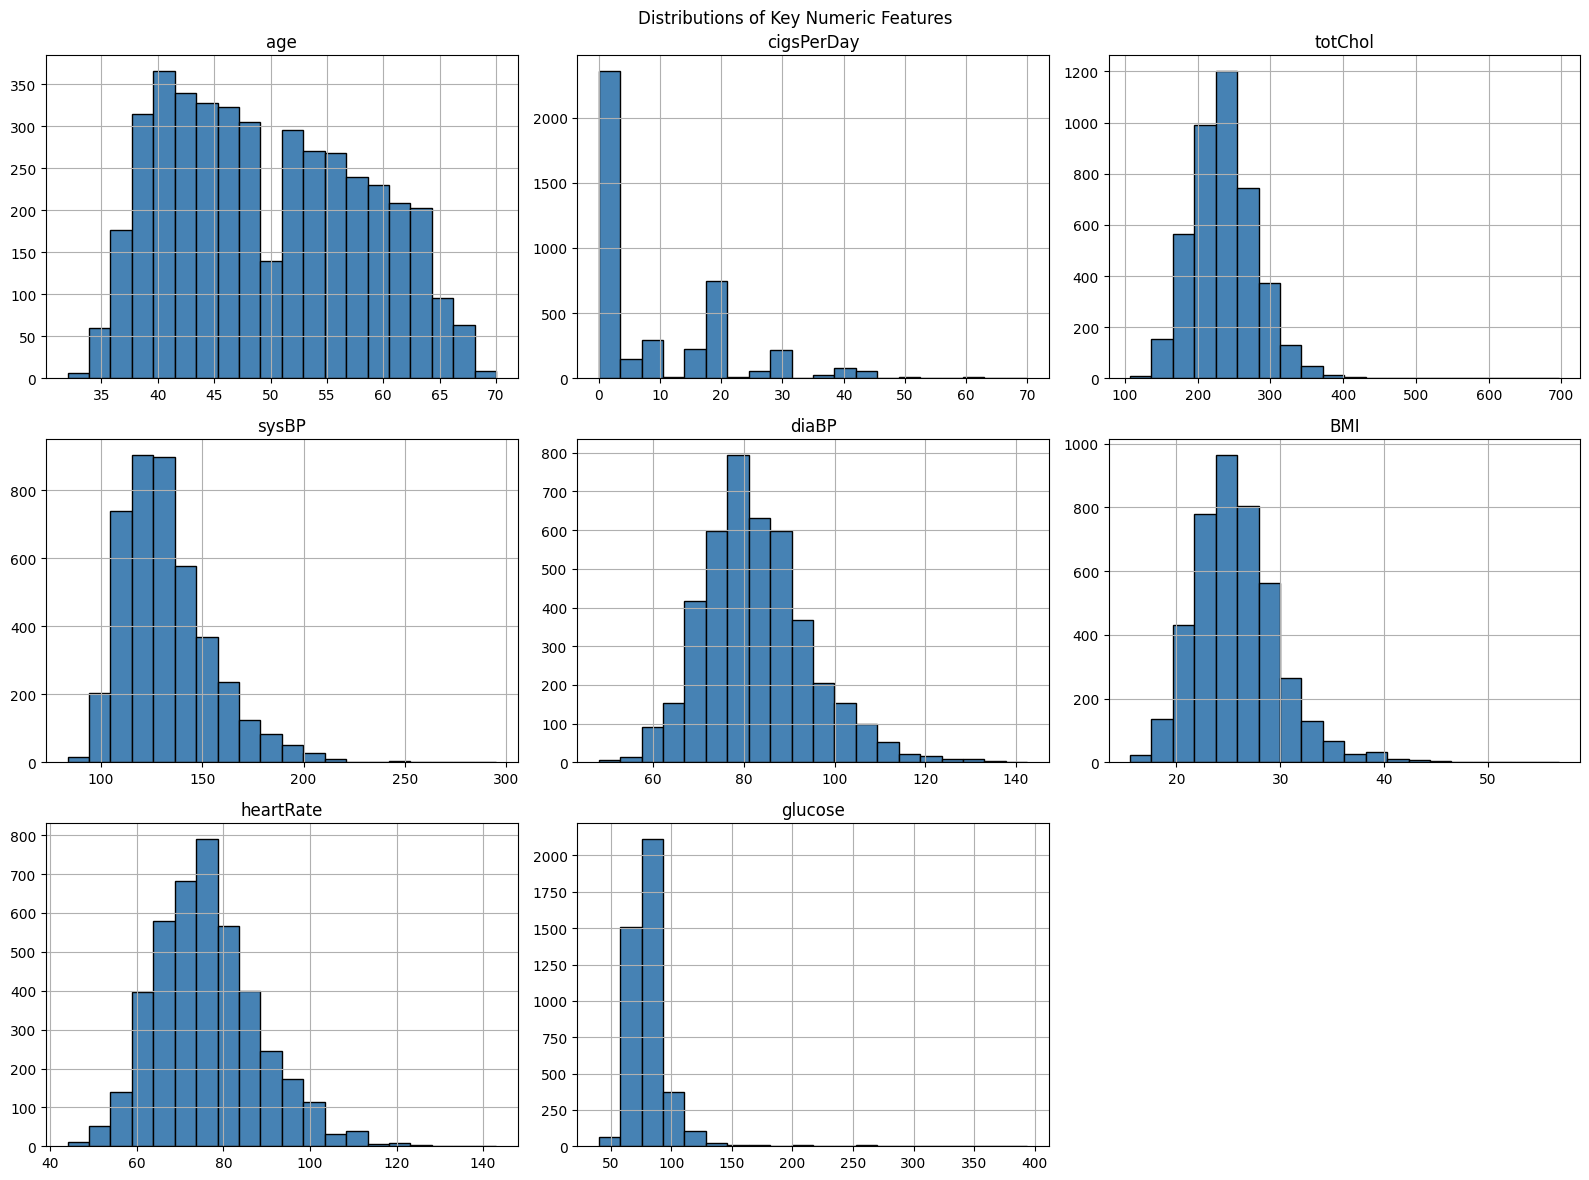

In [ ]:
#Plot Distributions of Numerical Features
# Select numeric features
numeric_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
# Plot histograms
df_fhs[numeric_features].hist(bins=20, figsize=(16, 12), color='steelblue', edgecolor='black')
plt.suptitle('Distributions of Key Numeric Features')
plt.tight_layout()
plt.show()

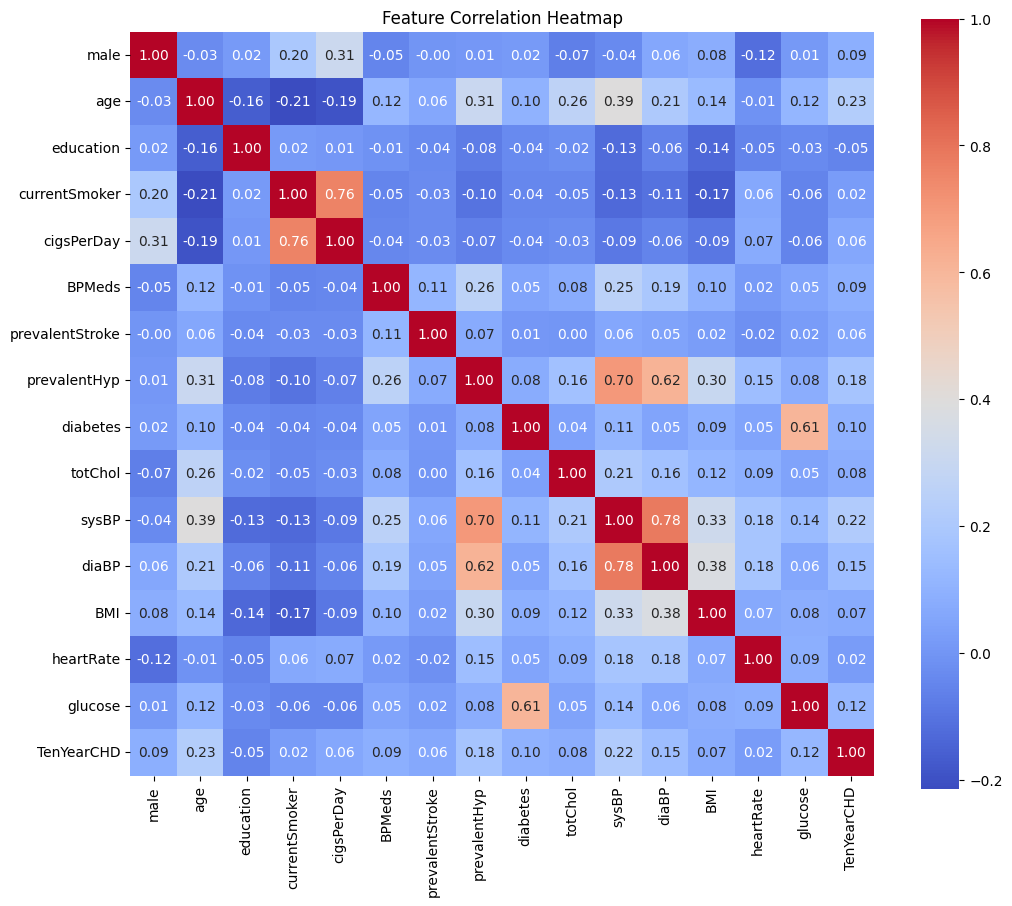

In [ ]:
#Correlation Heatmap
# Compute correlation matrix
corr_matrix = df_fhs.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

<ipython-input-13-3338baa90d1e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_fhs, x='TenYearCHD', y='age', palette='Set3')


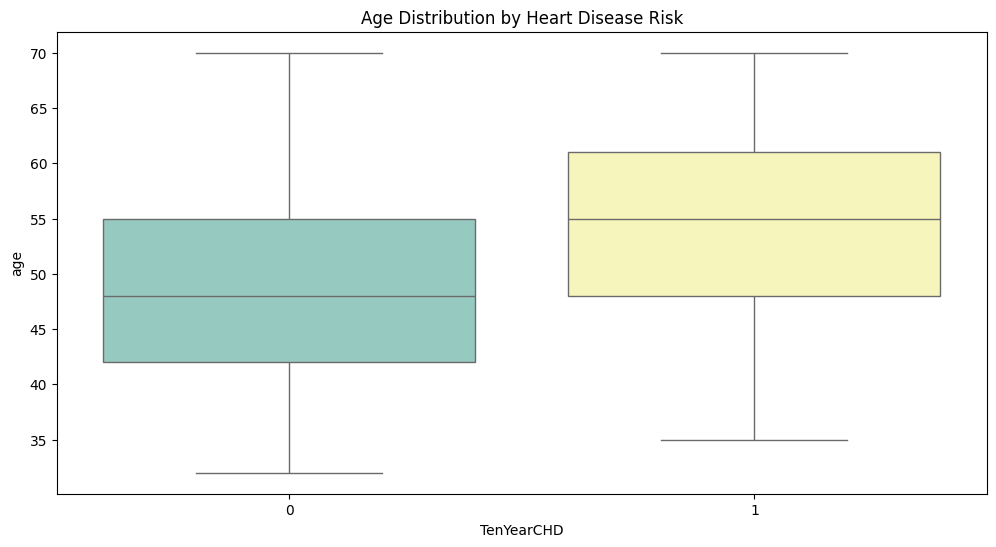

<ipython-input-13-3338baa90d1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_fhs, x='TenYearCHD', y='sysBP', palette='Set3')


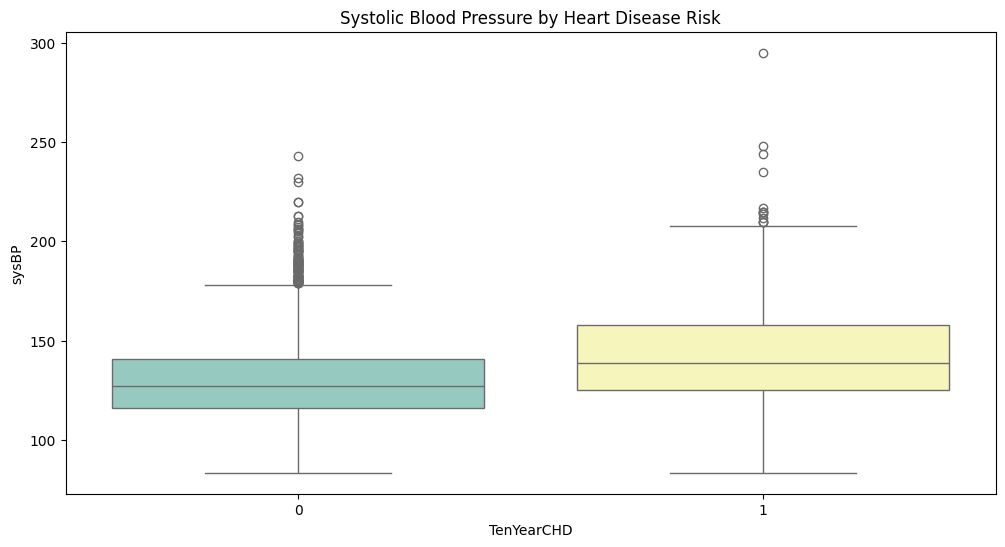

In [ ]:
#Boxplots – Key Features vs. Target
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fhs, x='TenYearCHD', y='age', palette='Set3')
plt.title('Age Distribution by Heart Disease Risk')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fhs, x='TenYearCHD', y='sysBP', palette='Set3')
plt.title('Systolic Blood Pressure by Heart Disease Risk')
plt.show()

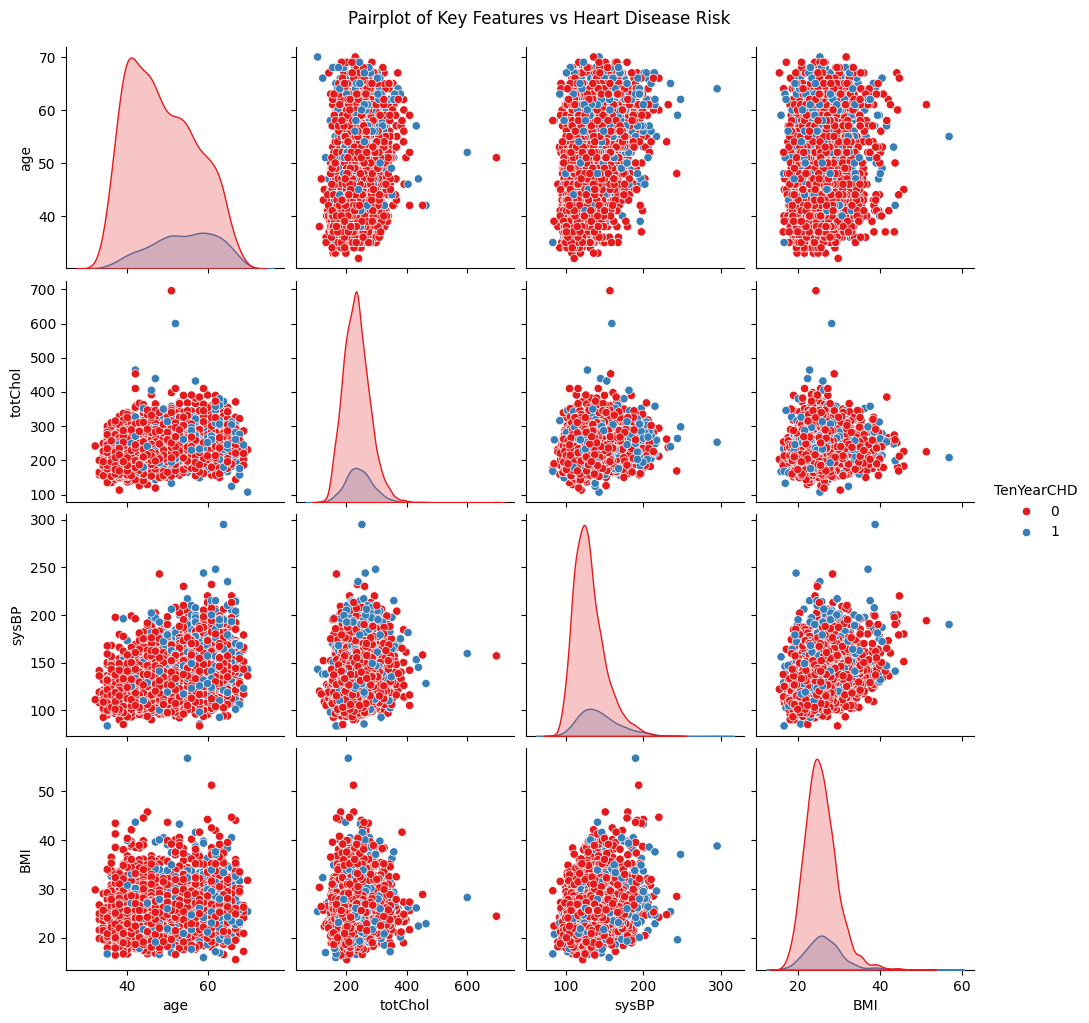

In [ ]:
#Pairplot
# Sample features to avoid overcrowding
sampled_features = ['age', 'totChol', 'sysBP', 'BMI', 'TenYearCHD']

sns.pairplot(df_fhs[sampled_features], hue='TenYearCHD', palette='Set1')
plt.suptitle('Pairplot of Key Features vs Heart Disease Risk', y=1.02)
plt.show()

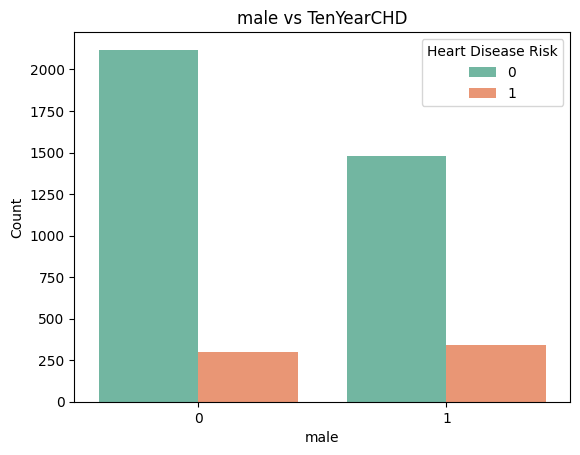

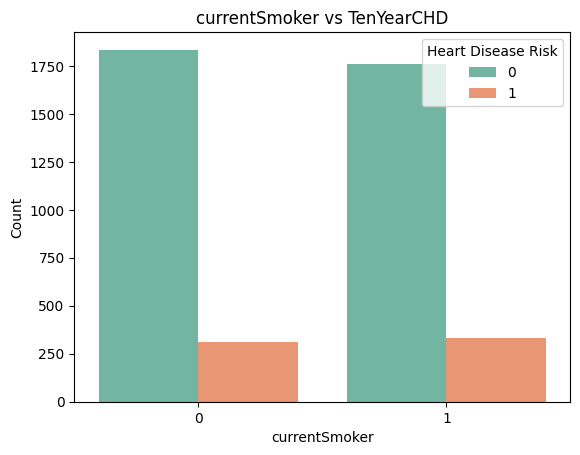

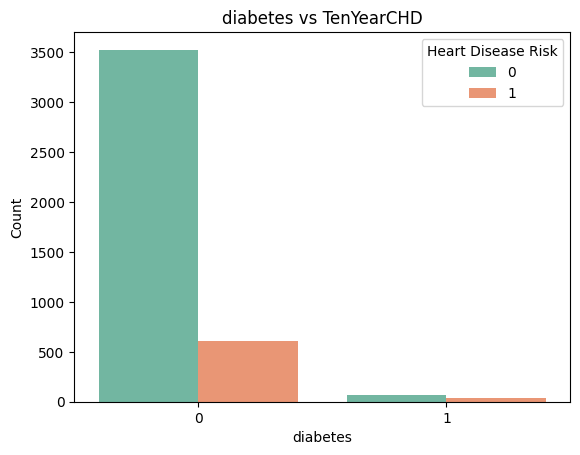

In [ ]:
#Barplots for Categorical Variables
categorical_vars = ['male', 'currentSmoker', 'diabetes']

for col in categorical_vars:
    sns.countplot(data=df_fhs, x=col, hue='TenYearCHD', palette='Set2')
    plt.title(f'{col} vs TenYearCHD')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease Risk')
    plt.show()

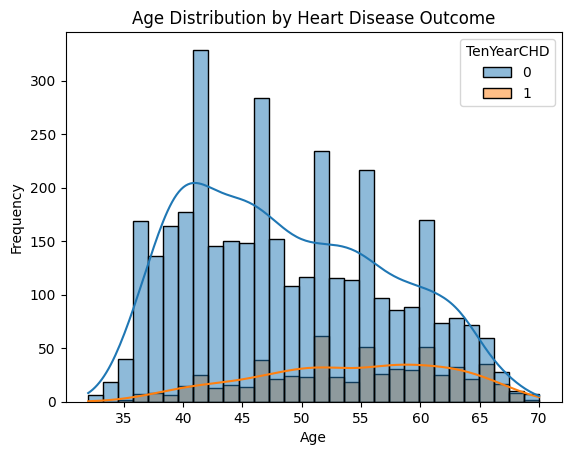

In [ ]:
# Age Distribution by Outcome
sns.histplot(data=df_fhs, x='age', hue='TenYearCHD', kde=True, bins=30)
plt.title("Age Distribution by Heart Disease Outcome")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# **Model Selection and Training**

In [ ]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_fhs_scaled, y_fhs, test_size=0.2, random_state=SEED, stratify=y_fhs
)

print(f"Train shape: {Xf_train.shape}, Test shape: {Xf_test.shape}")

Train shape: (3392, 15), Test shape: (848, 15)


In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred, y_proba=None):
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    if y_proba is not None:
        print(f"AUC:       {roc_auc_score(y_true, y_proba):.4f}")

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def show_confusion_matrix(y_true, y_pred, model_name):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        display_labels=['No CHD', 'CHD'],
        cmap='Blues'
    )
    disp.ax_.set_title(f'Confusion Matrix: {model_name}')
    plt.grid(False)
    plt.show()

In [ ]:
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc_score = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='navy')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000,random_state=SEED)
lr_model.fit(Xf_train, yf_train)

# Predict
y_lr_pred = lr_model.predict(Xf_test)
y_lr_proba = lr_model.predict_proba(Xf_test)[:, 1]

# Evaluate
print("🔹 Logistic Regression Performance:")
evaluate_model(yf_test, y_lr_pred, y_lr_proba)

🔹 Logistic Regression Performance:
Accuracy:  0.8443
Precision: 0.4118
Recall:    0.0543
F1 Score:  0.0959
AUC:       0.7022


In [ ]:
print("🔹 Classification Report — Logistic Regression")
print(classification_report(yf_test, y_lr_pred, target_names=['No CHD', 'CHD']))

🔹 Classification Report — Logistic Regression
              precision    recall  f1-score   support

      No CHD       0.85      0.99      0.91       719
         CHD       0.41      0.05      0.10       129

    accuracy                           0.84       848
   macro avg       0.63      0.52      0.51       848
weighted avg       0.79      0.84      0.79       848



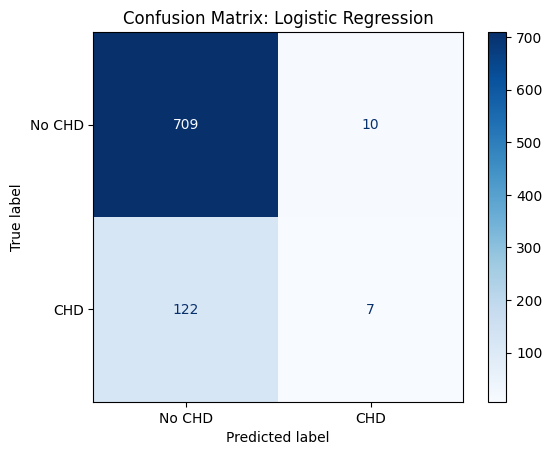

In [ ]:
# Confusion Matrix
show_confusion_matrix(yf_test, y_lr_pred, "Logistic Regression")

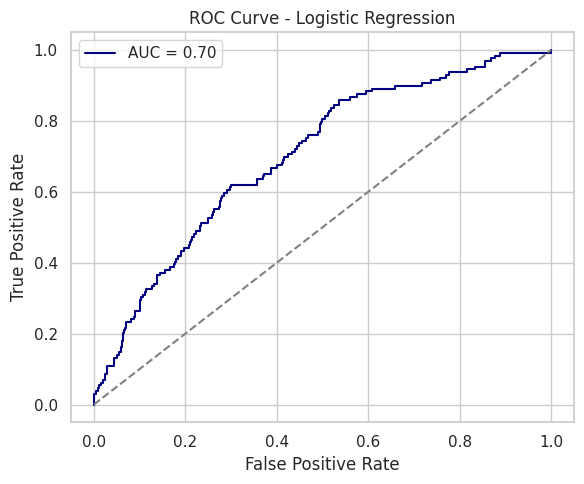

In [ ]:
y_lr_proba = lr_model.predict_proba(Xf_test)[:, 1]
plot_roc_curve(yf_test, y_lr_proba, "Logistic Regression")

# **2. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=SEED)
dt_model.fit(Xf_train, yf_train)

# Predict
y_dt_pred = dt_model.predict(Xf_test)
y_dt_proba = dt_model.predict_proba(Xf_test)[:, 1]

# Evaluate
print("🔹 Decision Tree Performance:")
evaluate_model(yf_test, y_dt_pred, y_dt_proba)

🔹 Decision Tree Performance:
Accuracy:  0.7488
Precision: 0.2000
Recall:    0.2171
F1 Score:  0.2082
AUC:       0.5306


In [ ]:
print("🔹 Classification Report — Decision Tree")
print(classification_report(yf_test, y_dt_pred, target_names=['No CHD', 'CHD']))

🔹 Classification Report — Decision Tree
              precision    recall  f1-score   support

      No CHD       0.86      0.84      0.85       719
         CHD       0.20      0.22      0.21       129

    accuracy                           0.75       848
   macro avg       0.53      0.53      0.53       848
weighted avg       0.76      0.75      0.75       848



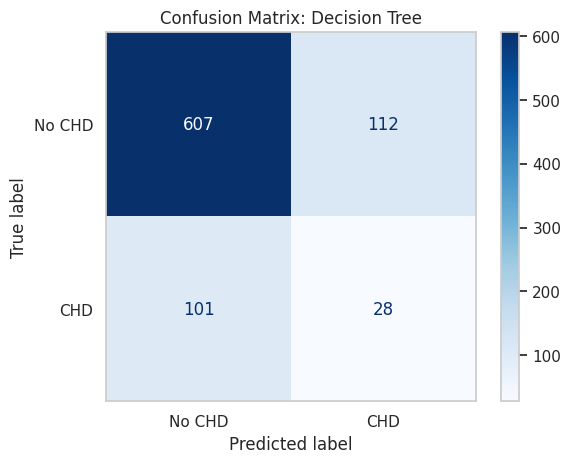

In [ ]:
show_confusion_matrix(yf_test, y_dt_pred, "Decision Tree")

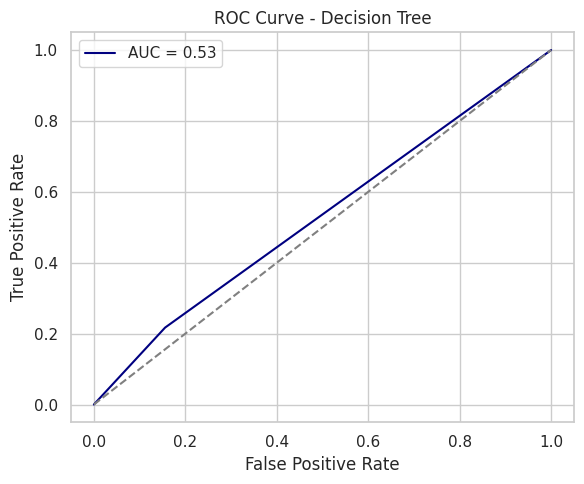

In [ ]:
y_dt_proba = dt_model.predict_proba(Xf_test)[:, 1]
plot_roc_curve(yf_test, y_dt_proba, "Decision Tree")

# **3. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_model.fit(Xf_train, yf_train)

y_rf_pred = rf_model.predict(Xf_test)
y_rf_proba = rf_model.predict_proba(Xf_test)[:, 1]

print("🔹 Random Forest Performance:")
evaluate_model(yf_test, y_rf_pred, y_rf_proba)

🔹 Random Forest Performance:
Accuracy:  0.8479
Precision: 0.5000
Recall:    0.0543
F1 Score:  0.0979
AUC:       0.6420


In [ ]:
print("🔹 Classification Report — Random Forest")
print(classification_report(yf_test, y_rf_pred, target_names=['No CHD', 'CHD']))

🔹 Classification Report — Random Forest
              precision    recall  f1-score   support

      No CHD       0.85      0.99      0.92       719
         CHD       0.50      0.05      0.10       129

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.51       848
weighted avg       0.80      0.85      0.79       848



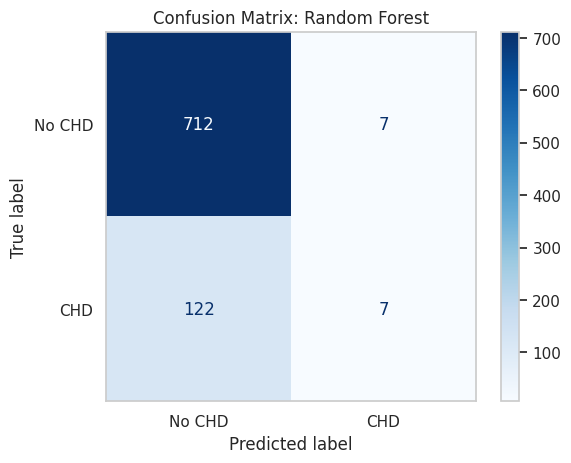

In [ ]:
show_confusion_matrix(yf_test, y_rf_pred, "Random Forest")

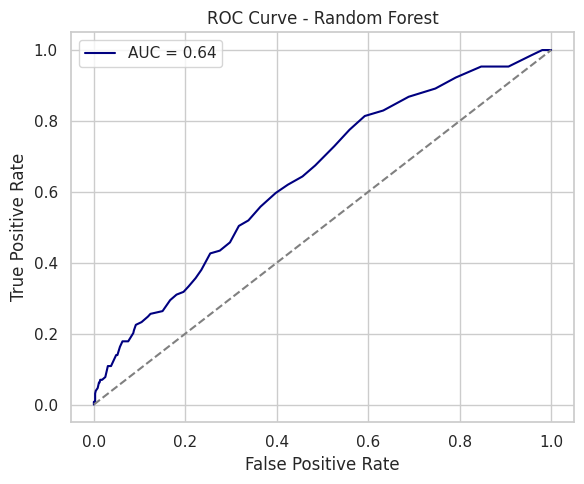

In [ ]:
y_rf_proba = rf_model.predict_proba(Xf_test)[:, 1]
plot_roc_curve(yf_test, y_rf_proba, "Random Forest")

# **4. Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=SEED)
svm_model.fit(Xf_train, yf_train)

y_svm_pred = svm_model.predict(Xf_test)
y_svm_proba = svm_model.predict_proba(Xf_test)[:, 1]

print("🔹 Support Vector Machine Performance:")
evaluate_model(yf_test, y_svm_pred, y_svm_proba)

🔹 Support Vector Machine Performance:
Accuracy:  0.8502
Precision: 0.7500
Recall:    0.0233
F1 Score:  0.0451
AUC:       0.5538


In [ ]:
print("🔹 Classification Report — SVM")
print(classification_report(yf_test, y_svm_pred, target_names=['No CHD', 'CHD']))

🔹 Classification Report — SVM
              precision    recall  f1-score   support

      No CHD       0.85      1.00      0.92       719
         CHD       0.75      0.02      0.05       129

    accuracy                           0.85       848
   macro avg       0.80      0.51      0.48       848
weighted avg       0.84      0.85      0.79       848



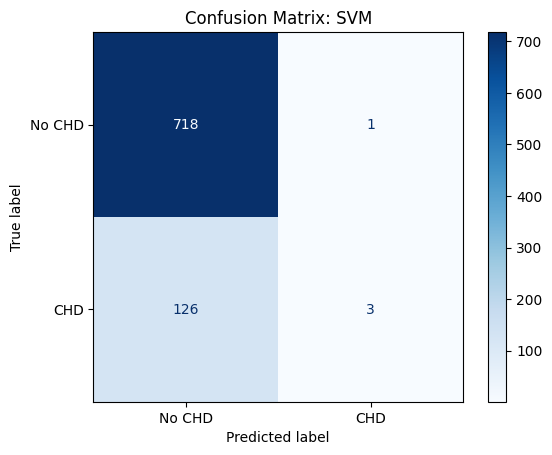

In [ ]:
show_confusion_matrix(yf_test, y_svm_pred, "SVM")

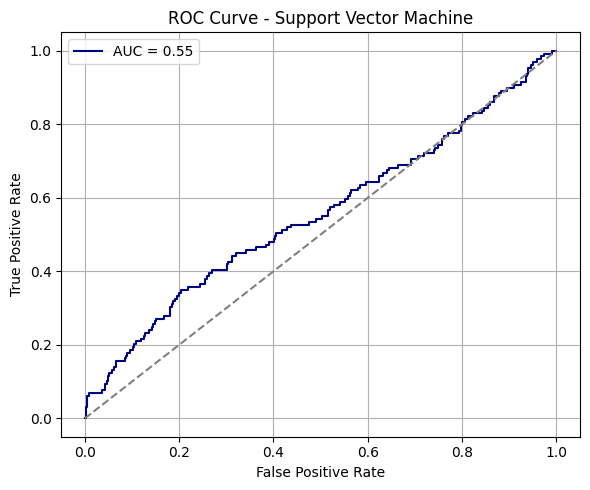

In [ ]:
y_svm_proba = svm_model.predict_proba(Xf_test)[:, 1]
plot_roc_curve(yf_test, y_svm_proba, "Support Vector Machine")

# **5. K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(Xf_train, yf_train)

y_knn_pred = knn_model.predict(Xf_test)
y_knn_proba = knn_model.predict_proba(Xf_test)[:, 1]

print("🔹 K-Nearest Neighbors Performance:")
evaluate_model(yf_test, y_knn_pred, y_knn_proba)

🔹 K-Nearest Neighbors Performance:
Accuracy:  0.8408
Precision: 0.4118
Recall:    0.1085
F1 Score:  0.1718
AUC:       0.5849


In [ ]:
print("🔹 Classification Report — KNN")
print(classification_report(yf_test, y_knn_pred, target_names=['No CHD', 'CHD']))

🔹 Classification Report — KNN
              precision    recall  f1-score   support

      No CHD       0.86      0.97      0.91       719
         CHD       0.41      0.11      0.17       129

    accuracy                           0.84       848
   macro avg       0.64      0.54      0.54       848
weighted avg       0.79      0.84      0.80       848



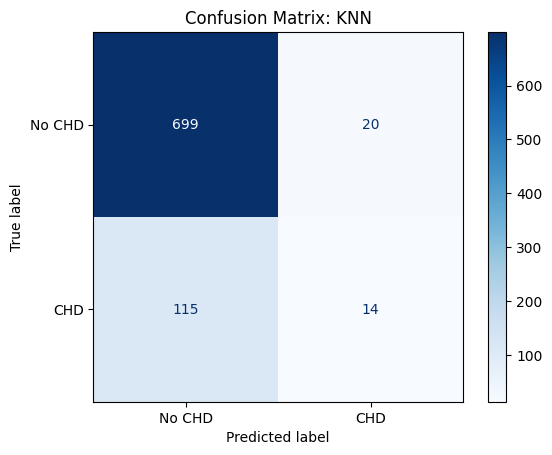

In [ ]:
show_confusion_matrix(yf_test, y_knn_pred, "KNN")

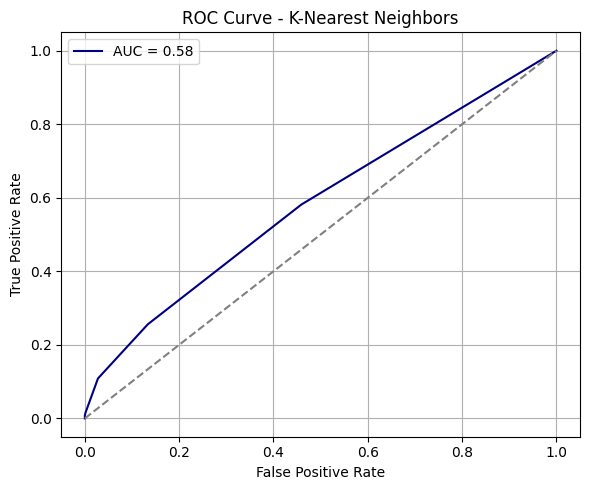

In [ ]:
y_knn_proba = knn_model.predict_proba(Xf_test)[:, 1]
plot_roc_curve(yf_test, y_knn_proba, "K-Nearest Neighbors")

# **6. Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=SEED)
gb_model.fit(Xf_train, yf_train)

y_gb_pred = gb_model.predict(Xf_test)
y_gb_proba = gb_model.predict_proba(Xf_test)[:, 1]

print("🔹 Gradient Boosting Performance:")
evaluate_model(yf_test, y_gb_pred, y_gb_proba)

🔹 Gradient Boosting Performance:
Accuracy:  0.8432
Precision: 0.4167
Recall:    0.0775
F1 Score:  0.1307
AUC:       0.6606


In [ ]:
print("🔹 Classification Report — Gradient Boosting")
print(classification_report(yf_test, y_gb_pred, target_names=['No CHD', 'CHD']))

🔹 Classification Report — Gradient Boosting
              precision    recall  f1-score   support

      No CHD       0.86      0.98      0.91       719
         CHD       0.42      0.08      0.13       129

    accuracy                           0.84       848
   macro avg       0.64      0.53      0.52       848
weighted avg       0.79      0.84      0.79       848



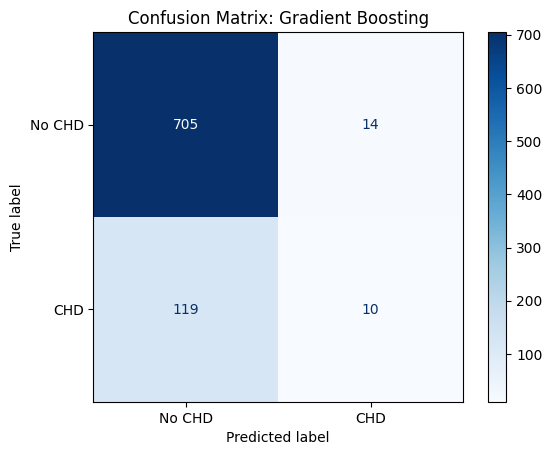

In [ ]:
show_confusion_matrix(yf_test, y_gb_pred, "Gradient Boosting")

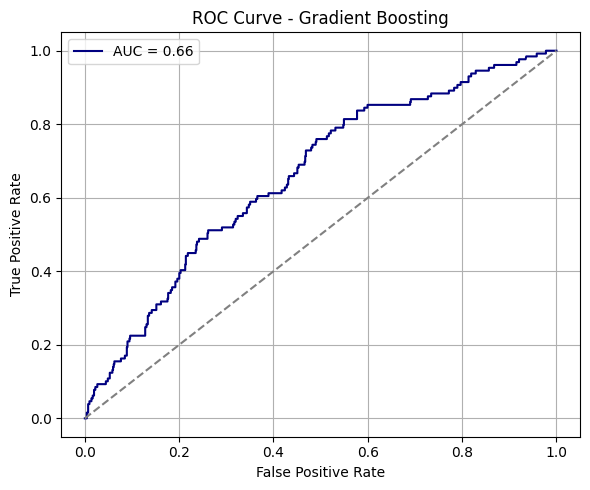

In [ ]:
y_gb_proba = gb_model.predict_proba(Xf_test)[:, 1]
plot_roc_curve(yf_test, y_gb_proba, "Gradient Boosting")

# **7. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(Xf_train, yf_train)

y_nb_pred = nb_model.predict(Xf_test)
y_nb_proba = nb_model.predict_proba(Xf_test)[:, 1]

print("🔹 Naive Bayes Performance:")
evaluate_model(yf_test, y_nb_pred, y_nb_proba)

🔹 Naive Bayes Performance:
Accuracy:  0.8054
Precision: 0.2500
Recall:    0.1395
F1 Score:  0.1791
AUC:       0.6755


In [ ]:
print("🔹 Classification Report — Naive Bayes")
print(classification_report(yf_test, y_nb_pred, target_names=['No CHD', 'CHD']))

🔹 Classification Report — Naive Bayes
              precision    recall  f1-score   support

      No CHD       0.86      0.92      0.89       719
         CHD       0.25      0.14      0.18       129

    accuracy                           0.81       848
   macro avg       0.55      0.53      0.53       848
weighted avg       0.76      0.81      0.78       848



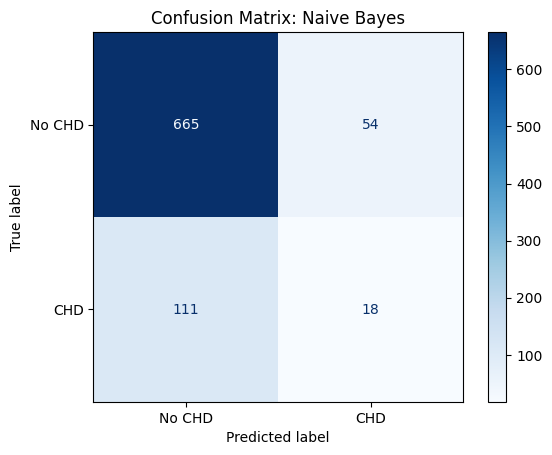

In [ ]:
show_confusion_matrix(yf_test, y_nb_pred, "Naive Bayes")

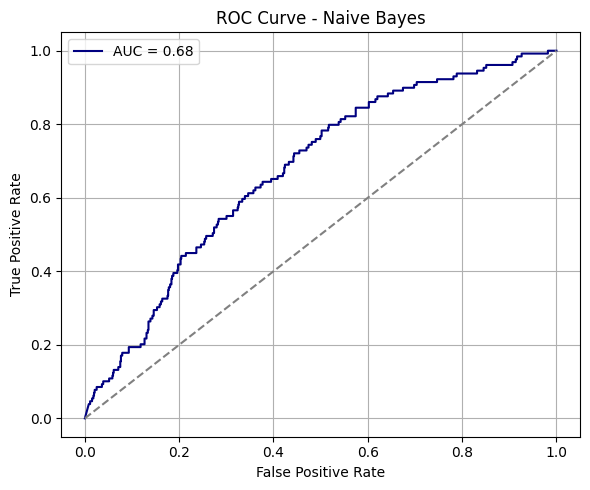

In [ ]:
y_nb_proba = nb_model.predict_proba(Xf_test)[:, 1]
plot_roc_curve(yf_test, y_nb_proba, "Naive Bayes")

# **Model Comparision**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000,random_state=SEED),
    'Decision Tree': DecisionTreeClassifier(random_state=SEED),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=SEED),
    'SVM': SVC(probability=True, random_state=SEED),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=SEED),
    'Naive Bayes': GaussianNB()
}

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

# Store all results
results = []

for name, model in models.items():
    model.fit(Xf_train, yf_train)
    y_pred = model.predict(Xf_test)
    y_proba = model.predict_proba(Xf_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(yf_test, y_pred)
    precision = precision_score(yf_test, y_pred)
    recall = recall_score(yf_test, y_pred)
    f1 = f1_score(yf_test, y_pred)
    auc = roc_auc_score(yf_test, y_proba) if y_proba is not None else None

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    })


In [ ]:
#Create DataFrame of Results
df_results = pd.DataFrame(results)
df_results.set_index('Model', inplace=True)
df_results

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Logistic Regression,0.844340,0.411765,0.054264,0.095890,0.702213
Decision Tree,0.748821,0.200000,0.217054,0.208178,0.530641
Random Forest,0.847877,0.500000,0.054264,0.097902,0.642009
SVM,0.850236,0.750000,0.023256,0.045113,0.553762
KNN,0.840802,0.411765,0.108527,0.171779,0.584937
Gradient Boosting,0.843160,0.416667,0.077519,0.130719,0.660580
Naive Bayes,0.805425,0.250000,0.139535,0.179104,0.675454


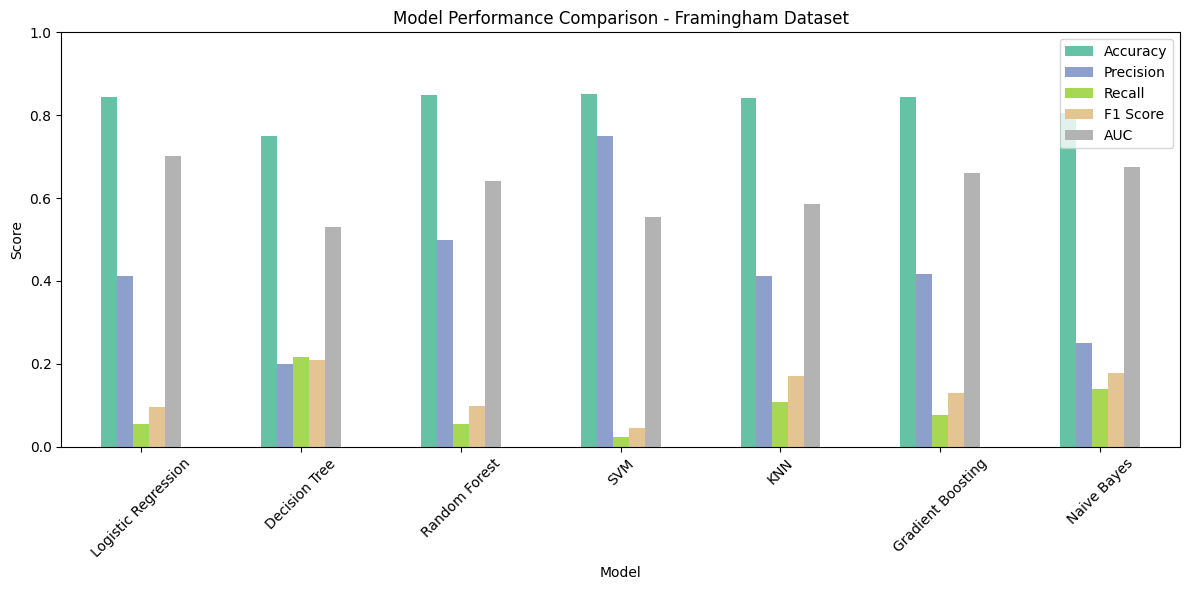

In [ ]:
df_results.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Model Performance Comparison - Framingham Dataset')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Cross-Validation for Each Model**

In [ ]:
from sklearn.model_selection import cross_val_score

# Create a new results list
cv_results = []

for name, model in models.items():
    # Use 5-fold cross-validation on accuracy
    accuracy = cross_val_score(model, X_fhs_scaled, y_fhs, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(model, X_fhs_scaled, y_fhs, cv=5, scoring='precision').mean()
    recall = cross_val_score(model, X_fhs_scaled, y_fhs, cv=5, scoring='recall').mean()
    f1 = cross_val_score(model, X_fhs_scaled, y_fhs, cv=5, scoring='f1').mean()
    auc = cross_val_score(model, X_fhs_scaled, y_fhs, cv=5, scoring='roc_auc').mean()

    cv_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    })

df_cv_results = pd.DataFrame(cv_results).set_index('Model')
df_cv_results

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Logistic Regression,0.853538,0.662092,0.077641,0.138721,0.724657
Decision Tree,0.758962,0.239334,0.268677,0.252974,0.557725
Random Forest,0.850000,0.563333,0.060550,0.109275,0.695718
SVM,0.848349,0.491111,0.017054,0.032585,0.610933
KNN,0.832547,0.299288,0.082243,0.127017,0.625724
Gradient Boosting,0.847642,0.483728,0.072965,0.126656,0.701202
Naive Bayes,0.823349,0.356223,0.204893,0.259529,0.711846


# **Rank Models by Interpretability**

In [ ]:
interpretability = {
    'Logistic Regression': 'High',
    'Decision Tree': 'High',
    'Random Forest': 'Medium',
    'Gradient Boosting': 'Medium',
    'Naive Bayes': 'Low',
    'SVM': 'Low',
    'KNN': 'Low'
}

df_cv_results['Interpretability'] = df_cv_results.index.map(interpretability)
df_cv_results

,Accuracy,Precision,Recall,F1 Score,AUC,Interpretability
Model,,,,,,
Logistic Regression,0.853538,0.662092,0.077641,0.138721,0.724657,High
Decision Tree,0.758962,0.239334,0.268677,0.252974,0.557725,High
Random Forest,0.850000,0.563333,0.060550,0.109275,0.695718,Medium
SVM,0.848349,0.491111,0.017054,0.032585,0.610933,Low
KNN,0.832547,0.299288,0.082243,0.127017,0.625724,Low
Gradient Boosting,0.847642,0.483728,0.072965,0.126656,0.701202,Medium
Naive Bayes,0.823349,0.356223,0.204893,0.259529,0.711846,Low


In [ ]:
df_cv_results.sort_values(by=['F1 Score', 'Interpretability'], ascending=[False, True])

,Accuracy,Precision,Recall,F1 Score,AUC,Interpretability
Model,,,,,,
Naive Bayes,0.823349,0.356223,0.204893,0.259529,0.711846,Low
Decision Tree,0.758962,0.239334,0.268677,0.252974,0.557725,High
Logistic Regression,0.853538,0.662092,0.077641,0.138721,0.724657,High
KNN,0.832547,0.299288,0.082243,0.127017,0.625724,Low
Gradient Boosting,0.847642,0.483728,0.072965,0.126656,0.701202,Medium
Random Forest,0.850000,0.563333,0.060550,0.109275,0.695718,Medium
SVM,0.848349,0.491111,0.017054,0.032585,0.610933,Low


# **Statistical Testing: Paired t-test Between Top Models**

In [ ]:
from scipy.stats import ttest_rel
from sklearn.model_selection import cross_val_score

# Pick top 2 models
top_model_names = df_cv_results.sort_values(by='F1 Score', ascending=False).head(6).index.tolist()

# Cross-validated F1 scores
scores_1 = cross_val_score(models[top_model_names[2]], X_fhs_scaled, y_fhs, cv=5, scoring='f1')
scores_2 = cross_val_score(models[top_model_names[5]], X_fhs_scaled, y_fhs, cv=5, scoring='f1')

# Paired t-test
t_stat, p_val = ttest_rel(scores_1, scores_2)

print(f"Paired t-test between {top_model_names[2]} and {top_model_names[5]}:")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print("✅ The performance difference is statistically significant.")
else:
    print("⚠️ The difference is not statistically significant.")


Paired t-test between Logistic Regression and Random Forest:
t-statistic = 6.4865, p-value = 0.0029
✅ The performance difference is statistically significant.


In [ ]:
from scipy.stats import ttest_rel
from sklearn.model_selection import cross_val_score

# Pick top 2 models
top_model_names = df_cv_results.sort_values(by='F1 Score', ascending=False).head(2).index.tolist()

# Cross-validated F1 scores
scores_1 = cross_val_score(models[top_model_names[0]], X_fhs_scaled, y_fhs, cv=5, scoring='f1')
scores_2 = cross_val_score(models[top_model_names[1]], X_fhs_scaled, y_fhs, cv=5, scoring='f1')

# Paired t-test
t_stat, p_val = ttest_rel(scores_1, scores_2)

print(f"Paired t-test between {top_model_names[0]} and {top_model_names[1]}:")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print("✅ The performance difference is statistically significant.")
else:
    print("⚠️ The difference is not statistically significant.")


Paired t-test between Naive Bayes and Decision Tree:
t-statistic = 0.2398, p-value = 0.8223
⚠️ The difference is not statistically significant.


# **Feature Importance from Random Forest**

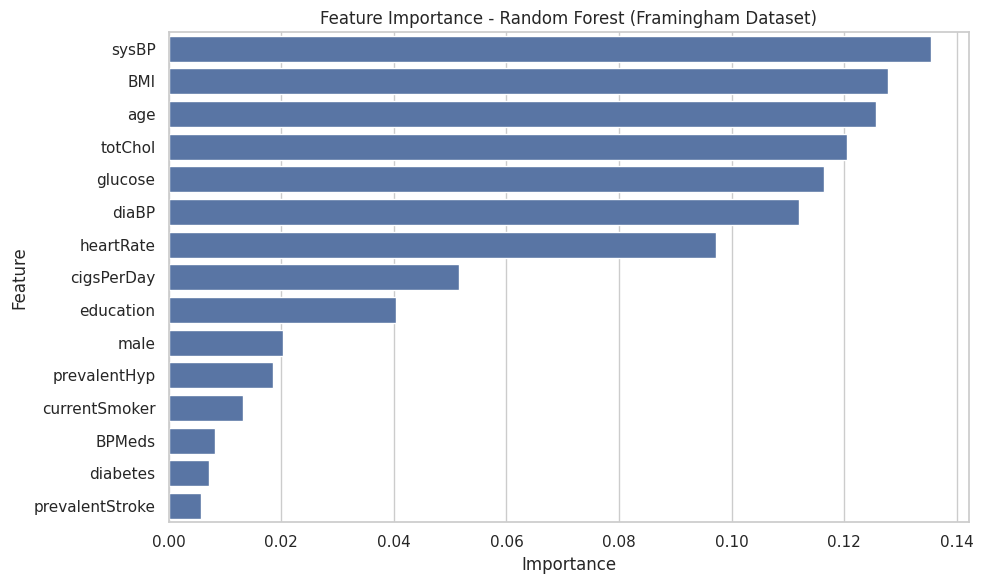

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use feature names from df_fhs (excluding the target)
feature_names = df_fhs.drop(columns=['TenYearCHD']).columns.tolist()

# Get importances from trained model
importances = rf_model.feature_importances_

# Create DataFrame and plot
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance - Random Forest (Framingham Dataset)")
plt.tight_layout()
plt.show()


# **Hyperparameter Tuning with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(Xf_train, yf_train)

# Best model
best_rf = grid_rf.best_estimator_

print("Best Parameters:", grid_rf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#Evaluate Tuned Model
y_best_rf_pred = best_rf.predict(Xf_test)
y_best_rf_proba = best_rf.predict_proba(Xf_test)[:, 1]

print(classification_report(yf_test, y_best_rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.55      0.05      0.09       129

    accuracy                           0.85       848
   macro avg       0.70      0.52      0.50       848
weighted avg       0.81      0.85      0.79       848



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for class 1 (MI)
y_best_rf_proba = best_rf.predict_proba(Xf_test)[:, 1]

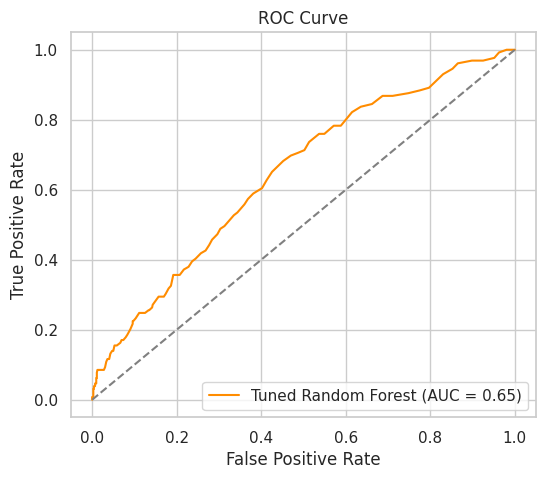

In [ ]:
fpr, tpr, thresholds = roc_curve(yf_test, y_best_rf_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Tuned Random Forest (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

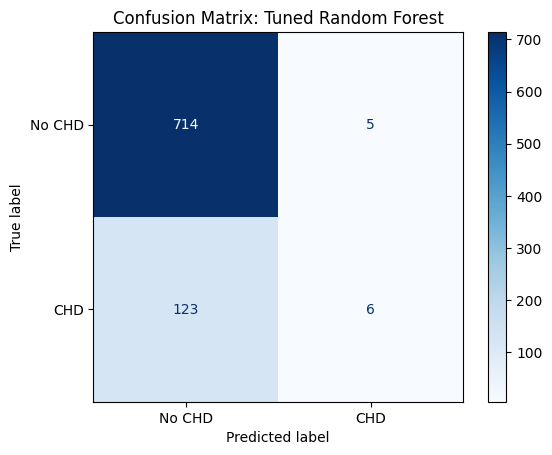

In [ ]:
show_confusion_matrix(yf_test, y_best_rf_pred, "Tuned Random Forest")

# **Pipeline B.1: Deep Learning on Raw ECG**

# **LSTM pipeline Using Raw ECG signals**

In [ ]:
!pip install wfdb
!pip install torch torchvision
!nvidia-smi

Sat Apr 26 13:47:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import zipfile
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to ZIP file in Google Drive
zip_path = "/content/drive/My Drive/ptb-xl.zip"

# Extraction path inside Colab
extract_path = "/content/ptbxl_data"

# Create the extraction directory
os.makedirs(extract_path, exist_ok=True)

In [ ]:
# Extract files
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete! Files are saved in:", extract_path)

Extraction complete! Files are saved in: /content/ptbxl_data


In [ ]:
# Check metadata CSV exists or not
metadata_path = os.path.join(extract_path, "/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv") #ptbxl_database.csv
print("Metadata file found:", os.path.exists(metadata_path))

Metadata file found: True


In [ ]:
import pandas as pd
import ast

# Load metadata
df_ptbxl = pd.read_csv('/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv')

In [ ]:
df_ptbxl.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

In [ ]:
df_ptbxl.shape

(21799, 28)

In [ ]:
df_ptbxl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

In [ ]:
df_ptbxl.describe()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21799.000000,21799.000000,21799.000000,21799.000000,6974.000000,9421.000000,20326.000000,21782.000000,12421.000000,21799.000000
mean,10926.658379,11250.156521,62.769301,0.479150,166.702323,70.995223,2.291745,1.544945,0.746075,5.503005
std,6302.393366,6235.026404,32.308813,0.499577,10.867321,15.878803,3.254033,4.172883,1.178003,2.874948
min,1.000000,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5469.500000,5974.500000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,10926.000000,11419.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16386.500000,16607.500000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21837.000000,21797.000000,300.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


In [ ]:
# Check for missing values
df_ptbxl.isnull().sum()

,0
ecg_id,0
patient_id,0
age,0
sex,0
height,14825
weight,12378
nurse,1473
site,17
device,0
recording_date,0


In [ ]:
import os
import ast
import wfdb
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve

import random
import torch

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
# Load metadata
df_ptbxl = pd.read_csv('/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv')
scp_df = pd.read_csv('/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/scp_statements.csv', index_col='Unnamed: 0')


# Get MI-related codes
mi_keys = scp_df[scp_df['diagnostic_class'] == 'MI'].index.tolist()

# Create binary label: MI = 1, non-MI = 0
def is_mi(scp_code_str):
    try:
        codes = ast.literal_eval(scp_code_str)
        return int(any(code in mi_keys for code in codes))
    except:
        return 0

df_ptbxl['label'] = df_ptbxl['scp_codes'].apply(is_mi)
print(df_ptbxl['label'].value_counts())

label
0    16330
1     5469
Name: count, dtype: int64


In [ ]:
# Balance classes
df_mi = df_ptbxl[df_ptbxl['label'] == 1]
df_non_mi = df_ptbxl[df_ptbxl['label'] == 0].sample(n=len(df_mi), random_state=SEED)
df_balanced = pd.concat([df_mi, df_non_mi]).sample(frac=1, random_state=SEED).reset_index(drop=True)

# ⚡ Optional: Reduce for fast testing
df_balanced = df_balanced.sample(n=4000, random_state=SEED)

# Split
df_train, df_test = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)

# **PyTorch Dataset for ECG Signals**

In [ ]:
class PTBXLDataset(Dataset):
    def __init__(self, df, base_path, signal_length=750):
        self.df = df
        self.base_path = base_path
        self.signal_length = signal_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        label = torch.tensor(row['label'], dtype=torch.float32)
        file_path = os.path.join(self.base_path, row['filename_lr'])

        record = wfdb.rdrecord(file_path)
        signal = record.p_signal[:self.signal_length, :]
        epsilon = 1e-8
        signal = (signal - signal.mean(axis=0)) / (signal.std(axis=0) + epsilon)
       # signal = (signal - signal.mean(axis=0)) / signal.std(axis=0)

        if signal.shape[0] < self.signal_length:
            pad_len = self.signal_length - signal.shape[0]
            pad = np.zeros((pad_len, 12))
            signal = np.vstack((signal, pad))

        return torch.tensor(signal, dtype=torch.float32), label


# **Create DataLoaders**

In [ ]:
base_path = '/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3'


train_dataset = PTBXLDataset(df_train, base_path)
test_dataset = PTBXLDataset(df_test, base_path)

# train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, pin_memory=True, num_workers=2)
# test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, pin_memory=True, num_workers=2)

In [ ]:
from torch.utils.data import DataLoader
import numpy as np

# 💡 SEED should already be set earlier in your code
SEED = 42

# Reproducibility for DataLoader workers
def seed_worker(worker_id):
    np.random.seed(SEED + worker_id)

g = torch.Generator()
g.manual_seed(SEED)

# ✅ Add these reproducible DataLoaders
train_loader = DataLoader(
    train_dataset,
    batch_size=128,
    shuffle=True,
    pin_memory=True,
    num_workers=2,
    worker_init_fn=seed_worker,
    generator=g
)

test_loader = DataLoader(
    test_dataset,
    batch_size=128,
    shuffle=False,
    pin_memory=True,
    num_workers=2,
    worker_init_fn=seed_worker,
    generator=g
)


In [ ]:
len(train_loader.dataset)

3200

In [ ]:
len(test_loader.dataset)

800

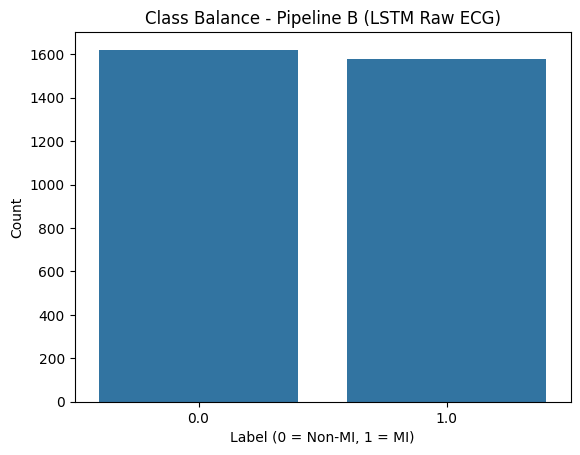

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming labels for train_dataset are available or created earlier
labels_b = [label for _, label in train_dataset]

sns.countplot(x=labels_b)
plt.title("Class Balance - Pipeline B (LSTM Raw ECG)")
plt.xlabel("Label (0 = Non-MI, 1 = MI)")
plt.ylabel("Count")
plt.show()

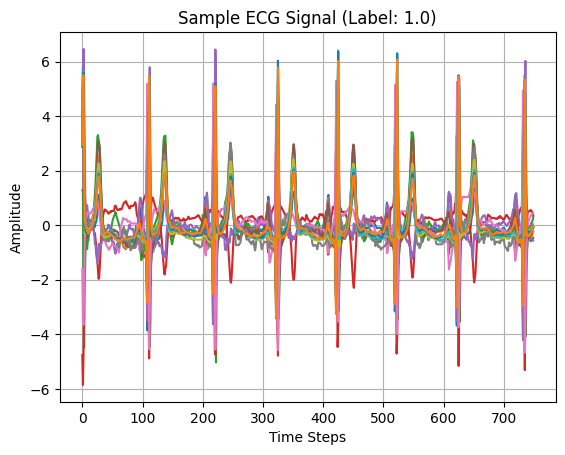

In [ ]:
sample_signal, sample_label = train_dataset[0]

# Convert tensor to NumPy for plotting
import matplotlib.pyplot as plt

sample_signal = sample_signal.numpy().squeeze()  # remove channel if present
plt.plot(sample_signal)
plt.title(f"Sample ECG Signal (Label: {sample_label})")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

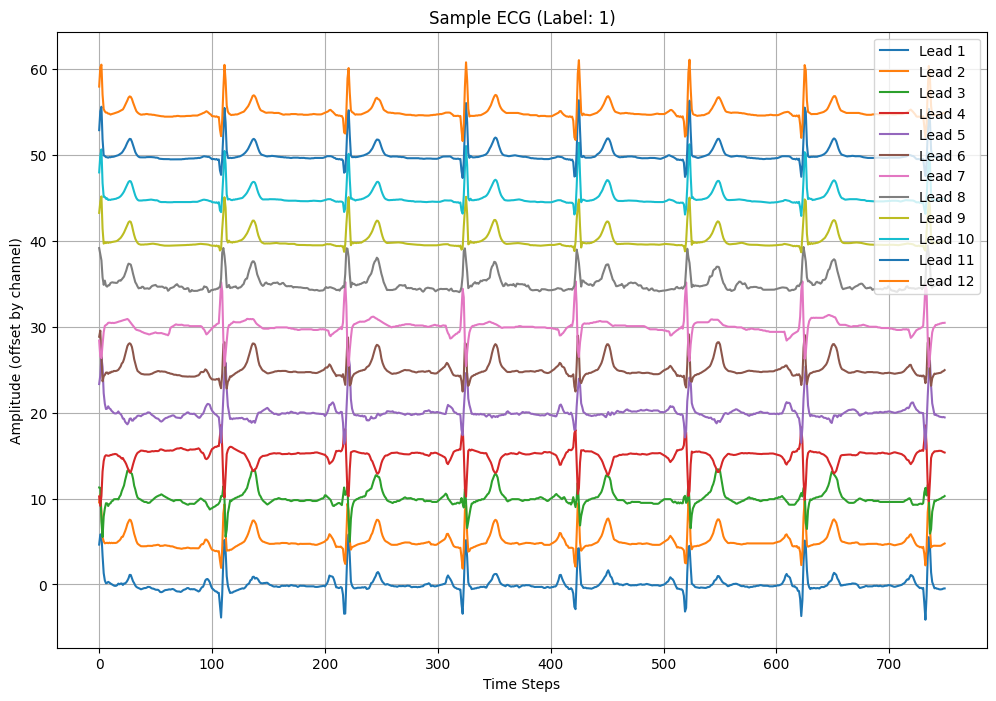

In [ ]:
# ECG Signal Plot
signal, label = train_dataset[0]
signal = signal.numpy()  # shape = [750, 12]

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.plot(signal[:, i] + i * 5, label=f'Lead {i+1}')  # offset each lead
plt.title(f"Sample ECG (Label: {int(label)})")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude (offset by channel)")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

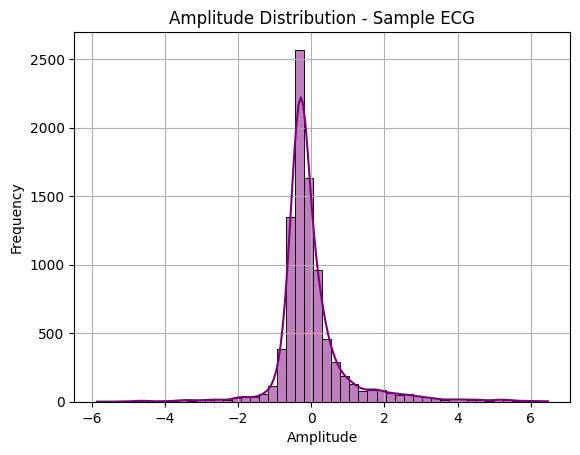

In [ ]:
# Combine amplitudes across all leads from a sample
flat_signal = signal.flatten()
sns.histplot(flat_signal, bins=50, kde=True, color="purple")
plt.title("Amplitude Distribution - Sample ECG")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# **LSTM Model**

In [ ]:
class TunedLSTM(nn.Module):
    def __init__(self, input_size=12, hidden_size=64, num_layers=2):
        super(TunedLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=True,
                            dropout=0.3)
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(hidden_size * 2, 1)  # *2 for bidirectional

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        hn_cat = torch.cat((hn[-2], hn[-1]), dim=1)  # concat directions
        out = self.dropout(hn_cat)
        return torch.sigmoid(self.fc(out)).squeeze()


# **CNN Model**

In [ ]:
class ECG_CNN(nn.Module):
    def __init__(self, input_length=750, num_classes=1):
        super(ECG_CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(12, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.flattened_size = (input_length // 4) * 64
        self.fc = nn.Linear(self.flattened_size, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Change to [batch, channels, time]
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return torch.sigmoid(self.fc(x)).squeeze()


In [ ]:
# lengths = [len(signal.numpy().squeeze()) for signal, _ in train_dataset]
# sns.histplot(lengths, kde=True)
# plt.title("Raw ECG Lengths (Before Padding)")
# plt.xlabel("Samples per ECG")
# plt.ylabel("Frequency")
# plt.show()

# **Train the Model**

In [ ]:
def train_model(model, loader, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for x_batch, y_batch in loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}: Loss = {total_loss/len(loader):.4f}")

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, loader, model_name="Model", return_predictions=False):
    model.eval()
    y_true, y_pred, y_prob = [], [], []

    with torch.no_grad():
        for x_batch, y_batch in loader:
            x_batch = x_batch.to(device)
            probs = model(x_batch).cpu().numpy()
            preds = (probs >= 0.5).astype(int)

            y_true.extend(y_batch.numpy())
            y_pred.extend(preds)
            y_prob.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    # ✅ Classification Report
    print(f"\n📊 {model_name} Evaluation:")
    print(f"Accuracy : {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1 Score: {f1:.4f} | AUC: {auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Non-MI", "MI"]))

    # ✅ ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ✅ Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-MI", "MI"]).plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.grid(False)
    plt.show()

    # ✅ Return for fusion if requested
    if return_predictions:
        return y_true, y_prob

    # Otherwise return metrics only
    return {
        "Model": model_name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "AUC": round(auc, 4)
    }


Epoch 1: Loss = 0.6928
Epoch 2: Loss = 0.6892
Epoch 3: Loss = 0.6821
Epoch 4: Loss = 0.6542
Epoch 5: Loss = 0.5981
Epoch 6: Loss = 0.5951
Epoch 7: Loss = 0.5704
Epoch 8: Loss = 0.5603
Epoch 9: Loss = 0.5849
Epoch 10: Loss = 0.5753
Epoch 11: Loss = 0.5585
Epoch 12: Loss = 0.5995
Epoch 13: Loss = 0.5666
Epoch 14: Loss = 0.5514
Epoch 15: Loss = 0.5523
Epoch 16: Loss = 0.5401
Epoch 17: Loss = 0.5272
Epoch 18: Loss = 0.5224
Epoch 19: Loss = 0.5350
Epoch 20: Loss = 0.5545
Epoch 21: Loss = 0.5607
Epoch 22: Loss = 0.5209
Epoch 23: Loss = 0.5090
Epoch 24: Loss = 0.5199
Epoch 25: Loss = 0.5502
Epoch 26: Loss = 0.5583
Epoch 27: Loss = 0.5685
Epoch 28: Loss = 0.5340
Epoch 29: Loss = 0.5202
Epoch 30: Loss = 0.5224
Epoch 31: Loss = 0.5075
Epoch 32: Loss = 0.5080
Epoch 33: Loss = 0.5493
Epoch 34: Loss = 0.5605
Epoch 35: Loss = 0.5138
Epoch 36: Loss = 0.4973
Epoch 37: Loss = 0.4962
Epoch 38: Loss = 0.4872
Epoch 39: Loss = 0.4931
Epoch 40: Loss = 0.4832
Epoch 41: Loss = 0.4732
Epoch 42: Loss = 0.4739
E

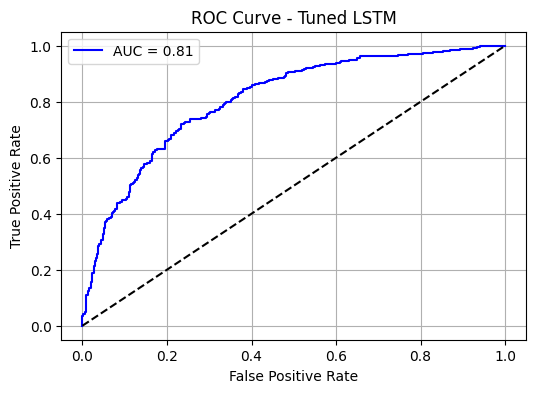

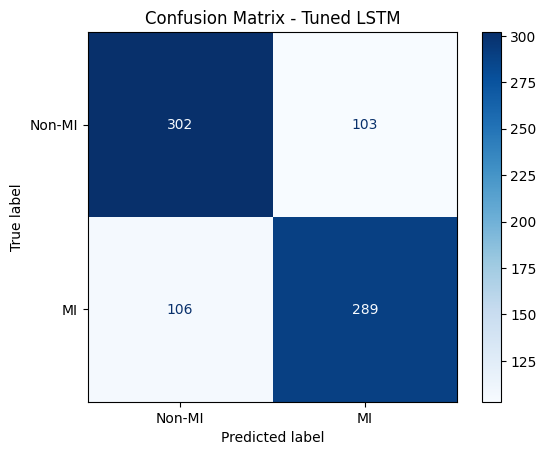

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results_pipeline_b = []

# 🔁 LSTM
model = TunedLSTM().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
train_model(model, train_loader, criterion, optimizer, epochs=100)
results_pipeline_b.append(evaluate_model(model, test_loader, "LSTM"))

Epoch 1: Loss = 0.6737
Epoch 2: Loss = 0.5471
Epoch 3: Loss = 0.4799
Epoch 4: Loss = 0.4537
Epoch 5: Loss = 0.4237
Epoch 6: Loss = 0.4016
Epoch 7: Loss = 0.3836
Epoch 8: Loss = 0.3617
Epoch 9: Loss = 0.3447
Epoch 10: Loss = 0.3175
Epoch 11: Loss = 0.2971
Epoch 12: Loss = 0.2802
Epoch 13: Loss = 0.2690
Epoch 14: Loss = 0.2600
Epoch 15: Loss = 0.2311
Epoch 16: Loss = 0.2208
Epoch 17: Loss = 0.2075
Epoch 18: Loss = 0.1871
Epoch 19: Loss = 0.1839
Epoch 20: Loss = 0.1709
Epoch 21: Loss = 0.1545
Epoch 22: Loss = 0.1471
Epoch 23: Loss = 0.1364
Epoch 24: Loss = 0.1222
Epoch 25: Loss = 0.1168
Epoch 26: Loss = 0.1190
Epoch 27: Loss = 0.1116
Epoch 28: Loss = 0.0930
Epoch 29: Loss = 0.0837
Epoch 30: Loss = 0.0806
Epoch 31: Loss = 0.0873
Epoch 32: Loss = 0.0765
Epoch 33: Loss = 0.0645
Epoch 34: Loss = 0.0612
Epoch 35: Loss = 0.0527
Epoch 36: Loss = 0.0495
Epoch 37: Loss = 0.0467
Epoch 38: Loss = 0.0425
Epoch 39: Loss = 0.0391
Epoch 40: Loss = 0.0346
Epoch 41: Loss = 0.0318
Epoch 42: Loss = 0.0331
E

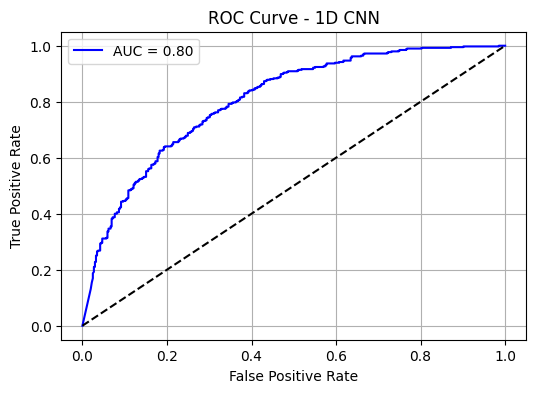

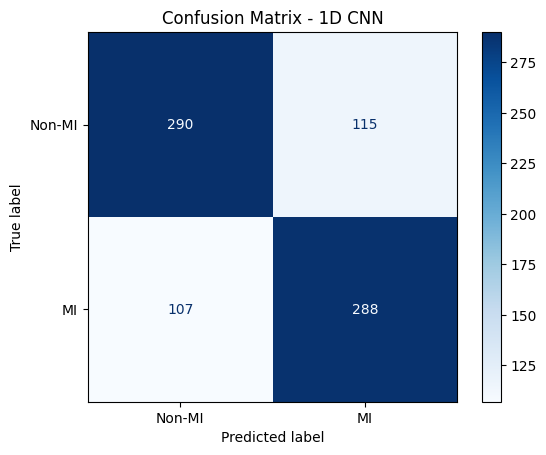

In [ ]:
# ➕ 1D CNN
model = ECG_CNN(input_length=750).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
train_model(model, train_loader, criterion, optimizer, epochs=100)
results_pipeline_b.append(evaluate_model(model, test_loader, "1D CNN"))


📊 Tuned LSTM Evaluation:
Accuracy : 0.7225 | Precision: 0.7146 | Recall: 0.7291 | F1 Score: 0.7218 | AUC: 0.8038

Classification Report:
               precision    recall  f1-score   support

      Non-MI       0.73      0.72      0.72       405
          MI       0.71      0.73      0.72       395

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



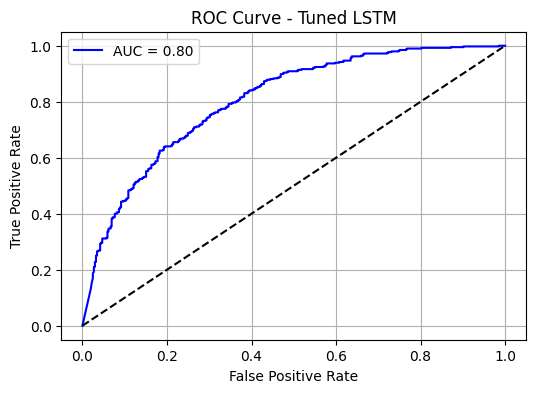

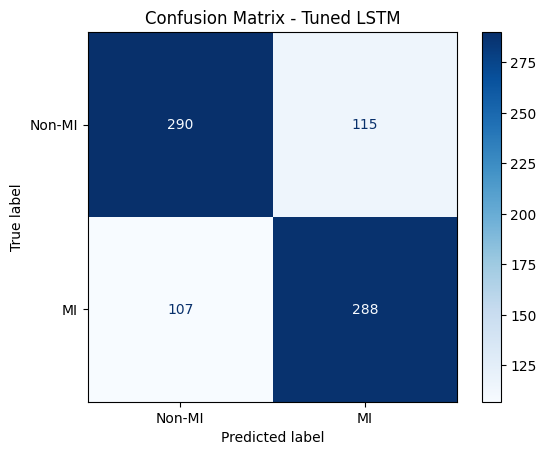

In [ ]:
y_lstm_true, y_lstm_proba = evaluate_model(model, test_loader, model_name="LSTM", return_predictions=True)

        Model  Accuracy  Precision  Recall  F1 Score     AUC
0  Tuned LSTM    0.7388     0.7372  0.7316    0.7344  0.8088
1      1D CNN    0.7225     0.7146  0.7291    0.7218  0.8038


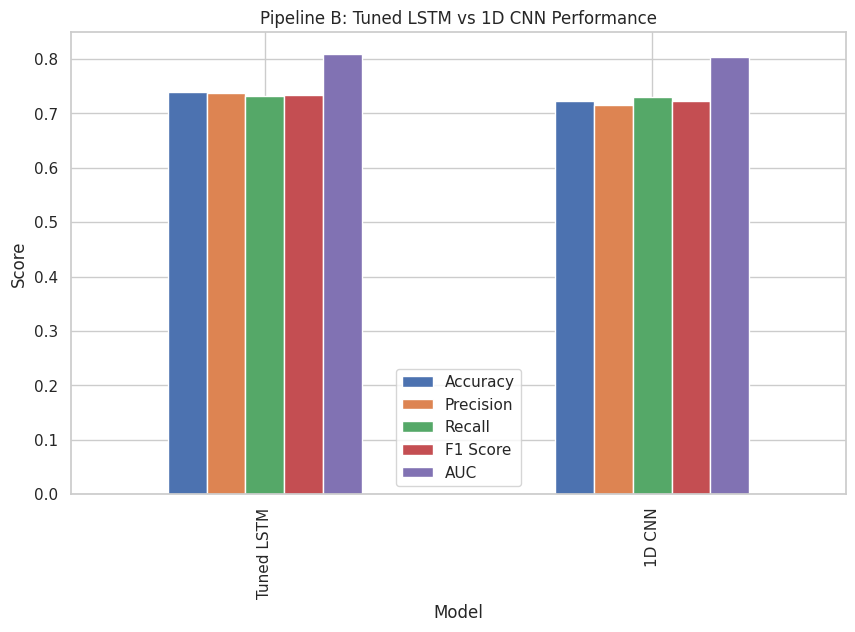

In [ ]:
results_df = pd.DataFrame(results_pipeline_b)
print(results_df)

import seaborn as sns
sns.set(style="whitegrid")
results_df.set_index("Model").plot(kind="bar", figsize=(10,6))
plt.title("Pipeline B: LSTM vs 1D CNN Performance")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# **Pipeline B.2: ML on Engineered ECG Features**

# **Extract features from ECG waveforms**

In [ ]:
!pip install wfdb
!pip install neurokit2
!pip install scikit-learn
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 19.2 MB/s eta 0:00:00


In [ ]:
import zipfile
import os
import wfdb
import neurokit2 as nk
import numpy as np
import pandas as pd
import scipy.signal
import multiprocessing
from joblib import Parallel, delayed
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from joblib import Parallel, delayed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to ZIP file in Google Drive
zip_path = "/content/drive/My Drive/ptb-xl.zip"

# Extraction path inside Colab
extract_path = "/content/ptbxl_data"

# Create the extraction directory
os.makedirs(extract_path, exist_ok=True)

In [ ]:
# Extract files
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete! Files are saved in:", extract_path)

Extraction complete! Files are saved in: /content/ptbxl_data


In [ ]:
# List of extracted files
for root, dirs, files in os.walk(extract_path):
    print(root, "contains", len(files), "files")

/content/ptbxl_data contains 0 files
/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3 contains 8 files
/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100 contains 0 files
/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/09000 contains 1994 files
/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/14000 contains 2000 files
/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/07000 contains 1994 files
/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/17000 contains 2000 files
/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/13000 contains 1990 files
/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/08000 contains 200

In [ ]:
# Check metadata CSV exists or not
metadata_path = os.path.join(extract_path, "/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv") #ptbxl_database.csv
print("Metadata file found:", os.path.exists(metadata_path))


Metadata file found: True


In [ ]:
ecg_dir = os.path.join(extract_path, "/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/00000")
print("Files in directory:", os.listdir(ecg_dir)[:5])  # Show first 5 files

Files in directory: ['00957_hr.hea', '00742_hr.hea', '00361_hr.dat', '00566_hr.hea', '00439_hr.dat']


# **ECG Feature Engineering**

In [ ]:
!pip install wfdb neurokit2 scikit-learn imbalanced-learn

In [ ]:
import pandas as pd
import os
import ast
import numpy as np
import neurokit2 as nk
import wfdb
import warnings
from joblib import Parallel, delayed

In [ ]:
# Load metadata
df_ptbxl = pd.read_csv('/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv')
scp_df = pd.read_csv('/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/scp_statements.csv', index_col='Unnamed: 0')

# Get MI-related SCP codes
mi_keys = scp_df[scp_df['diagnostic_class'] == 'MI'].index.tolist()

# Label function
def is_mi(scp_code_str):
    try:
        codes = ast.literal_eval(scp_code_str)
        return int(any(code in mi_keys for code in codes))
    except:
        return 0

df_ptbxl['label'] = df_ptbxl['scp_codes'].apply(is_mi)
print("✅ MI label distribution:\n", df_ptbxl['label'].value_counts())


✅ MI label distribution:
 label
0    16330
1     5469
Name: count, dtype: int64


In [ ]:
base_path = "/content/ptbxl_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500"
record_list = []

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".dat"):
            full_path = os.path.join(root, file[:-4])
            record_list.append(full_path)

print("✅ Total ECG records found:", len(record_list))


✅ Total ECG records found: 21799


In [ ]:
sampling_rate = 500
num_workers = 2
batch_size = 200

def compute_hrv_metrics(rpeaks_idx):
    if len(rpeaks_idx) < 2:
        return None
    rr_intervals = np.diff(rpeaks_idx) * (1000 / sampling_rate)
    mean_nn = np.mean(rr_intervals)
    sdnn = np.std(rr_intervals, ddof=1)
    rmssd = np.sqrt(np.mean(np.square(np.diff(rr_intervals))))
    return mean_nn, sdnn, rmssd

# --- ECG Feature Extractor ---
def extract_ecg_features(record_path):
    try:
        if not os.path.exists(record_path + ".dat"):
            return None
        signals, _ = wfdb.rdsamp(record_path)
        signals = signals.astype(np.float32)
        if signals.shape[0] == 0 or np.all(signals == 0):
            return None

        _, rpeaks = nk.ecg_peaks(signals[:, 0], sampling_rate=sampling_rate)
        rpeaks_idx = rpeaks["ECG_R_Peaks"]
        if len(rpeaks_idx) < 2:
            return None
        hrv_vals = compute_hrv_metrics(rpeaks_idx)
        if hrv_vals is None:
            return None
        mean_nn, sdnn, rmssd = hrv_vals
        qrs_duration = mean_nn

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            ecg_signals, _ = nk.ecg_process(signals[:, 0], sampling_rate=sampling_rate)

        ecg_signals = ecg_signals.fillna(0).astype(np.float32)

        pr_interval = (
            abs(np.nanmean(ecg_signals["ECG_Q_Peaks"] - ecg_signals["ECG_P_Peaks"])) / sampling_rate
            if "ECG_Q_Peaks" in ecg_signals and "ECG_P_Peaks" in ecg_signals else 0
        )
        qt_interval = (
            abs(np.nanmean(ecg_signals["ECG_T_Peaks"] - ecg_signals["ECG_Q_Peaks"])) / sampling_rate
            if "ECG_T_Peaks" in ecg_signals and "ECG_Q_Peaks" in ecg_signals else 0
        )
        # st_elevation = (
        #     np.ptp(ecg_signals["ECG_ST_Segment"]) if "ECG_ST_Segment" in ecg_signals else 0
        # )
        heart_rate = (
            np.nanmean(ecg_signals["ECG_Rate"]) if "ECG_Rate" in ecg_signals else 0
        )
        ####
        # record_name = os.path.basename(record_path)
        # Add Lead-specific features (optional per lead if you process multiple leads)
        qrs_amplitude = np.ptp(signals[:, 0])  # Peak-to-peak amplitude in Lead I
        signal_energy = np.sum(np.square(signals[:, 0]))  # Energy of the signal
        signal_entropy = -np.sum(np.nan_to_num(ecg_signals["ECG_Clean"] * np.log(ecg_signals["ECG_Clean"] + 1e-8)))

        return {
            # "record_name": record_name,
            "HRV_MeanNN": mean_nn,
            "HRV_SDNN": sdnn,
            "HRV_RMSSD": rmssd,
            "QRS_Duration": qrs_duration,
            "PR_interval": pr_interval,
            "QT_interval": qt_interval,
            # "ST_elevation": st_elevation,
            "Heart_Rate": heart_rate,
            # Then add to your return dictionary:
            "QRS_Amplitude": qrs_amplitude,
            "Signal_Energy": signal_energy,
            "Signal_Entropy": signal_entropy,

        }

    except:
        return None


def process_in_batches(records, batch_size=200):
    all_features = []
    for i in range(0, len(records), batch_size):
        batch = records[i:i+batch_size]
        print(f"Processing batch {i}-{i+len(batch)}...")
        batch_features = Parallel(n_jobs=num_workers)(
            delayed(extract_ecg_features)(rec) for rec in batch
        )
        all_features.extend(filter(None, batch_features))
    return all_features

# Limit samples for faster testing
# record_list = record_list[:400]
ecg_features = process_in_batches(record_list)
ecg_features_df = pd.DataFrame(ecg_features)


Processing batch 0-200...
Processing batch 200-400...
Processing batch 400-600...
Processing batch 600-800...
Processing batch 800-1000...
Processing batch 1000-1200...
Processing batch 1200-1400...
Processing batch 1400-1600...
Processing batch 1600-1800...
Processing batch 1800-2000...
Processing batch 2000-2200...
Processing batch 2200-2400...
Processing batch 2400-2600...
Processing batch 2600-2800...
Processing batch 2800-3000...
Processing batch 3000-3200...
Processing batch 3200-3400...
Processing batch 3400-3600...
Processing batch 3600-3800...
Processing batch 3800-4000...
Processing batch 4000-4200...
Processing batch 4200-4400...
Processing batch 4400-4600...
Processing batch 4600-4800...
Processing batch 4800-5000...
Processing batch 5000-5200...
Processing batch 5200-5400...
Processing batch 5400-5600...
Processing batch 5600-5800...
Processing batch 5800-6000...
Processing batch 6000-6200...
Processing batch 6200-6400...
Processing batch 6400-6600...
Processing batch 6600

In [ ]:
ecg_features_df.head(5)

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,QRS_Duration,PR_interval,QT_interval,Heart_Rate,QRS_Amplitude,Signal_Energy,Signal_Entropy
0,1061.500000,278.511862,307.687225,1061.500000,4.000000e-07,0.000000e+00,49.610577,1.087,79.423477,168.817169
1,933.600000,33.912305,29.318178,933.600000,4.000000e-07,0.000000e+00,64.402534,1.407,104.100723,226.195709
2,948.222222,16.414763,21.177819,948.222222,8.000000e-07,8.000000e-07,63.277557,1.535,199.753540,278.608276
3,943.777778,22.032804,17.916473,943.777778,4.000000e-07,4.000000e-07,65.549637,0.600,44.922554,260.378784
4,800.909091,177.778207,204.503301,800.909091,4.000000e-07,0.000000e+00,67.286873,0.912,68.024673,285.279236


In [ ]:
# print("Extracted ECG Features Overview:")
ecg_features_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21788 entries, 0 to 21787
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HRV_MeanNN      21788 non-null  float64
 1   HRV_SDNN        21768 non-null  float64
 2   HRV_RMSSD       21768 non-null  float64
 3   QRS_Duration    21788 non-null  float64
 4   PR_interval     21788 non-null  float32
 5   QT_interval     21788 non-null  float32
 6   Heart_Rate      21788 non-null  float32
 7   QRS_Amplitude   21788 non-null  float32
 8   Signal_Energy   21788 non-null  float32
 9   Signal_Entropy  21788 non-null  float32
dtypes: float32(6), float64(4)
memory usage: 1.2 MB


In [ ]:
ecg_features_df.describe()

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,QRS_Duration,PR_interval,QT_interval,Heart_Rate,QRS_Amplitude,Signal_Energy,Signal_Entropy
count,21788.000000,21768.000000,21768.000000,21788.000000,2.178800e+04,2.178800e+04,21788.000000,21788.000000,21788.000000,21788.000000
mean,837.513899,84.726739,105.210781,837.513899,5.028639e-07,4.752157e-07,74.741959,1.183656,172.400909,250.852371
std,247.823788,137.723549,192.472783,247.823788,5.618959e-07,7.820083e-07,16.696861,0.791394,5325.076172,82.932236
min,329.071429,0.000000,0.000000,329.071429,0.000000e+00,0.000000e+00,32.262936,0.219000,2.102751,-6092.010742
25%,725.371795,15.776565,15.006469,725.371795,4.000000e-07,0.000000e+00,63.423446,0.853000,50.517893,211.592281
50%,829.272727,40.501527,41.163974,829.272727,4.000000e-07,4.000000e-07,71.715904,1.097000,85.168793,248.680519
75%,929.133333,113.093411,139.741014,929.133333,4.000000e-07,4.000000e-07,82.768566,1.385000,142.122475,286.490982
max,9502.000000,4714.988017,6668.000000,9502.000000,1.040000e-05,1.000000e-05,190.522751,65.408005,734998.687500,832.576050


In [ ]:
ecg_features_df.isnull().sum()

,0
HRV_MeanNN,0
HRV_SDNN,20
HRV_RMSSD,20
QRS_Duration,0
PR_interval,0
QT_interval,0
Heart_Rate,0
QRS_Amplitude,0
Signal_Energy,0
Signal_Entropy,0


# **Data Visualization**

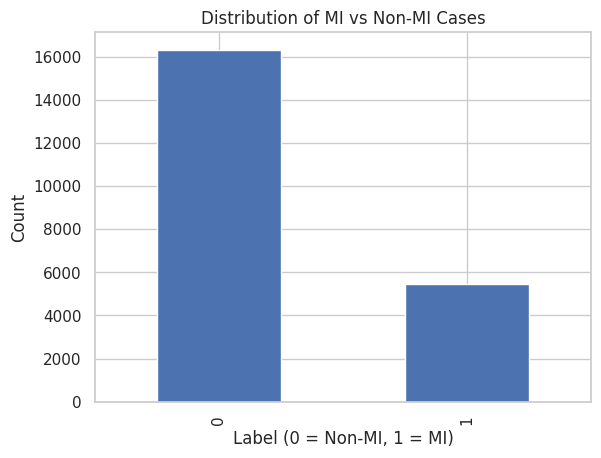

In [ ]:
#Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# sns.countplot(x=y)
df_ptbxl['label'].value_counts().plot.bar()
plt.title("Distribution of MI vs Non-MI Cases")
plt.xlabel("Label (0 = Non-MI, 1 = MI)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


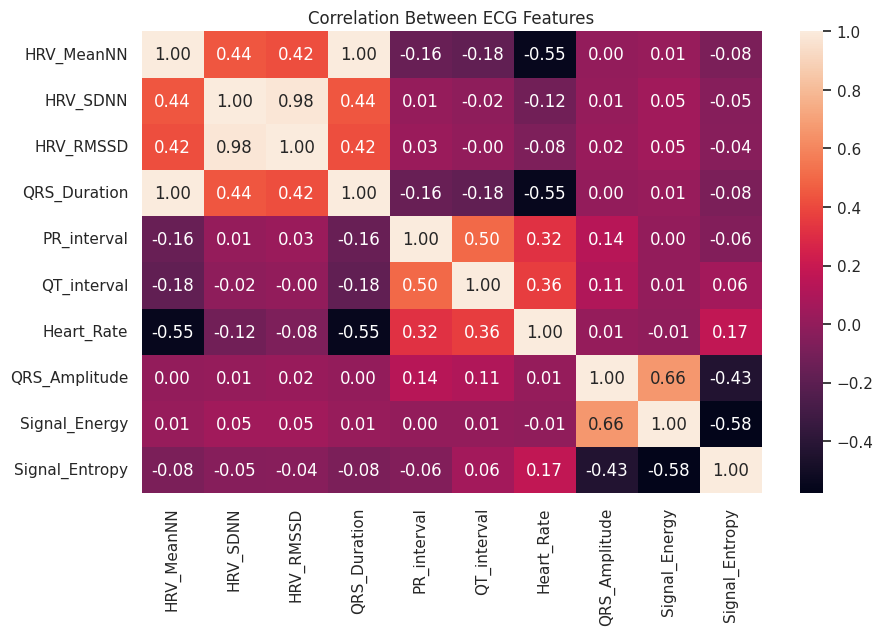

In [ ]:
# 📈 Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ecg_features_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Between ECG Features")
plt.show()

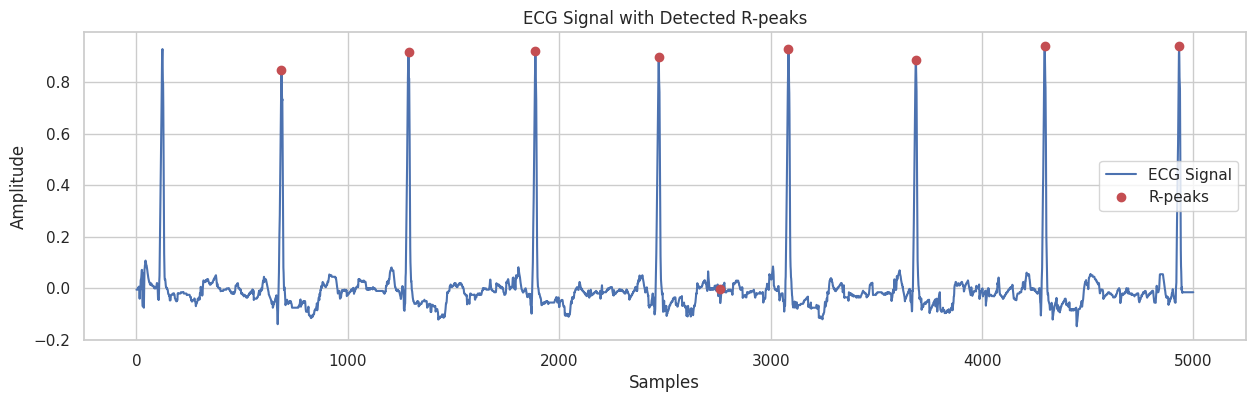

In [ ]:
# ECG record path to visualize (after record_list is built)
sample_record = record_list[0]

# Load ECG signal
signals, _ = wfdb.rdsamp(sample_record)
signal = signals[:, 0]

# Detect R-peaks
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=500)

# Plot ECG with R-peaks
plt.figure(figsize=(15, 4))
plt.plot(signal, label="ECG Signal")
plt.plot(rpeaks["ECG_R_Peaks"], signal[rpeaks["ECG_R_Peaks"]], "ro", label="R-peaks")
plt.title("ECG Signal with Detected R-peaks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


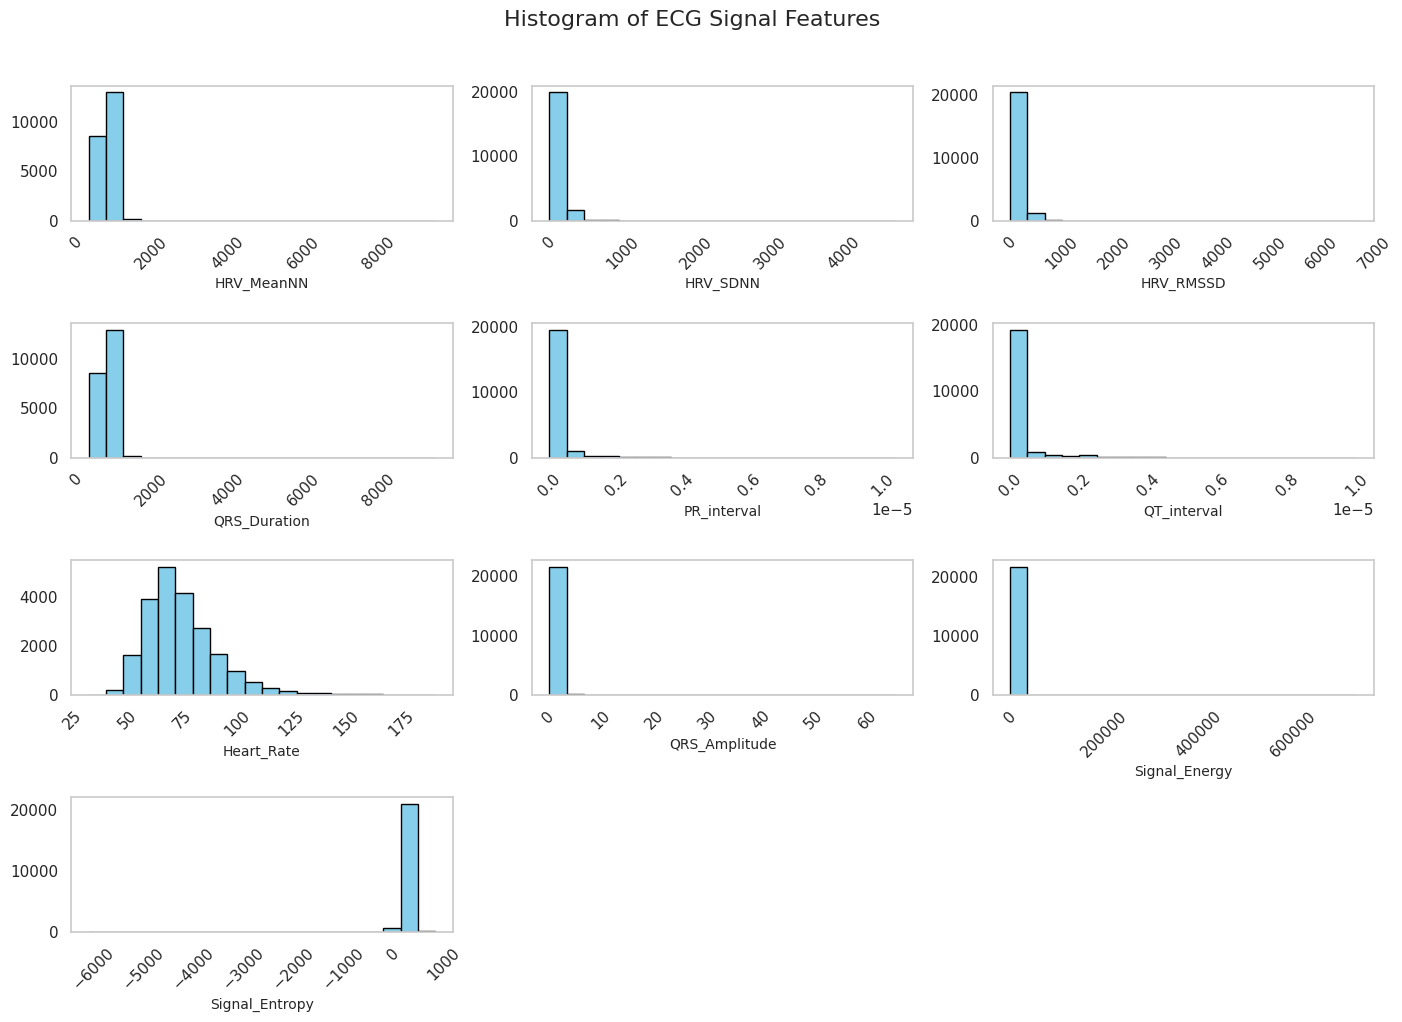

In [ ]:
import matplotlib.pyplot as plt

# Set larger figure and adjust layout
ax = ecg_features_df.hist(
    bins=20,
    figsize=(14, 10),
    color="skyblue",
    edgecolor="black",
    grid=False
)

# Rotate x-axis labels for readability
for axes in ax.flatten():
    axes.set_xlabel(axes.get_title(), fontsize=10)
    axes.set_title("")  # Remove duplicate titles
    axes.tick_params(axis='x', rotation=45)

plt.suptitle("Histogram of ECG Signal Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
# Prepare matching keys
df_ptbxl['record_id'] = df_ptbxl['filename_hr'].apply(lambda x: os.path.basename(x).replace(".dat", ""))
filenames = [os.path.basename(path).replace('.dat', '') for path in record_list[:len(ecg_features_df)]]

# Match records
df_labels_filtered = df_ptbxl[df_ptbxl['record_id'].isin(filenames)]
df_labels_filtered = df_labels_filtered.set_index('record_id').loc[filenames]

# Final feature matrix and target
X = ecg_features_df.iloc[:len(filenames)].values
y = df_labels_filtered['label'].values

# print("✅ X shape:", X.shape)
# print("✅ y shape:", y.shape)


In [ ]:
import numpy as np

# Combine X and y into a DataFrame for safe filtering
df_Xy = pd.DataFrame(X)
df_Xy['label'] = y

# Drop rows with any NaNs
df_Xy = df_Xy.dropna()

# Separate again
X = df_Xy.drop(columns='label').values
y = df_Xy['label'].values

# print("✅ After dropna:", X.shape, y.shape)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# **One By One**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Train Model**

In [ ]:
results = []  # This will collect metrics for comparison

In [ ]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test, return_proba=False, results=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Use probability or decision function
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # ✅ Append to results if provided
    if results is not None:
        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "AUC": auc
        })

    # 📊 Print metrics
    print(f"\n📌 {name} Evaluation:")
    print(f"Accuracy : {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1 Score: {f1:.4f} | AUC: {auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Non-Disease", "Disease"]))

    # 🧩 Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Disease", "Disease"])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

    # 📈 ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ✅ Return probabilities for late fusion (optional)
    if return_proba:
        return y_test, y_proba
    else:
        return None, None

# **LogisticRegression**


📌 Logistic Regression Evaluation:
Accuracy : 0.5864 | Precision: 0.2632 | Recall: 0.3608 | F1 Score: 0.3044 | AUC: 0.5146

Classification Report:
               precision    recall  f1-score   support

 Non-Disease       0.76      0.66      0.71      3262
     Disease       0.26      0.36      0.30      1092

    accuracy                           0.59      4354
   macro avg       0.51      0.51      0.51      4354
weighted avg       0.63      0.59      0.61      4354



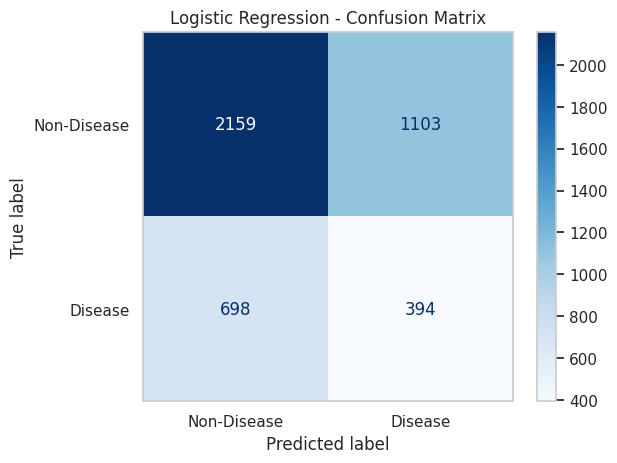

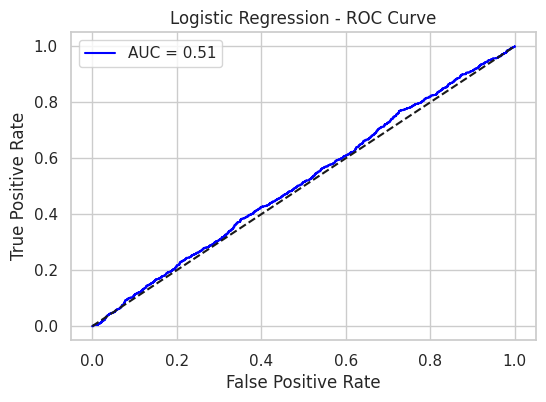

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=SEED)
_, _ = evaluate_model("Logistic Regression", lr_model, X_train_scaled, X_test_scaled, y_train, y_test)


# **Decision Tree**


📌 Decision Tree Evaluation:
Accuracy : 0.5177 | Precision: 0.2607 | Recall: 0.5027 | F1 Score: 0.3433 | AUC: 0.5165

Classification Report:
               precision    recall  f1-score   support

 Non-Disease       0.76      0.52      0.62      3262
     Disease       0.26      0.50      0.34      1092

    accuracy                           0.52      4354
   macro avg       0.51      0.51      0.48      4354
weighted avg       0.63      0.52      0.55      4354



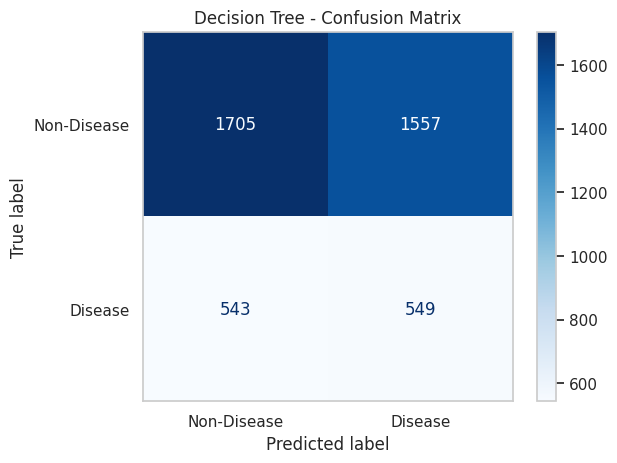

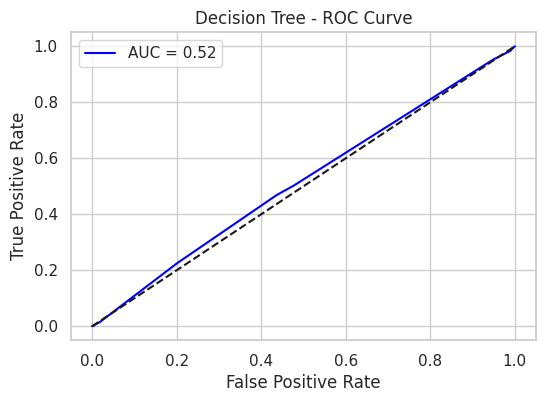

In [ ]:
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=SEED)
_, _ = evaluate_model("Decision Tree", dt_model, X_train_scaled, X_test_scaled, y_train, y_test, results=results)

# **Random Forest**


📌 Random Forest Evaluation:
Accuracy : 0.7469 | Precision: 0.2500 | Recall: 0.0046 | F1 Score: 0.0090 | AUC: 0.5086

Classification Report:
               precision    recall  f1-score   support

 Non-Disease       0.75      1.00      0.85      3262
     Disease       0.25      0.00      0.01      1092

    accuracy                           0.75      4354
   macro avg       0.50      0.50      0.43      4354
weighted avg       0.62      0.75      0.64      4354



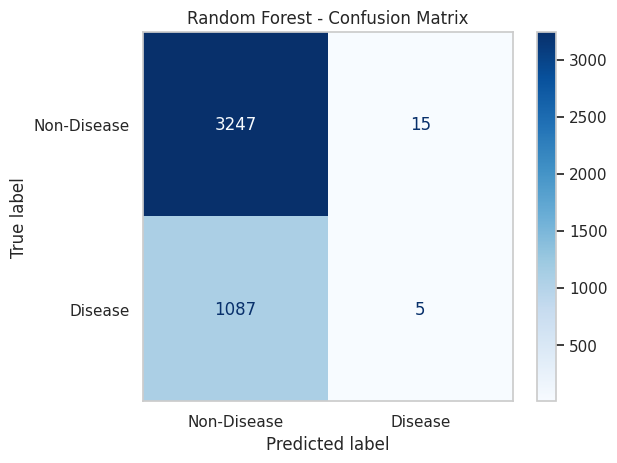

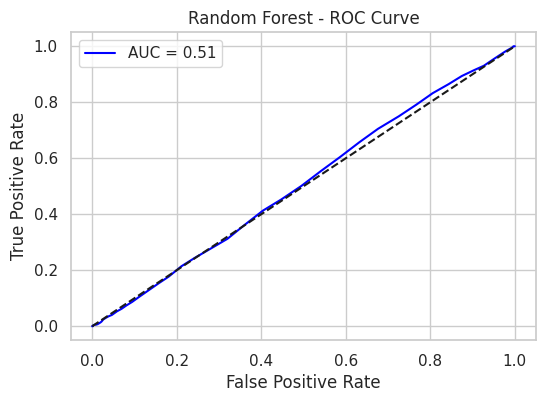

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=SEED)
y_ptbxl_b2, y_ptbxl_proba = evaluate_model("Random Forest", rf_model, X_train_scaled, X_test_scaled, y_train, y_test, return_proba=True, results=results)

# **SVM**


📌 SVM (Linear) Evaluation:
Accuracy : 0.7193 | Precision: 0.2149 | Recall: 0.0449 | F1 Score: 0.0742 | AUC: 0.4910

Classification Report:
               precision    recall  f1-score   support

 Non-Disease       0.75      0.95      0.83      3262
     Disease       0.21      0.04      0.07      1092

    accuracy                           0.72      4354
   macro avg       0.48      0.49      0.45      4354
weighted avg       0.61      0.72      0.64      4354



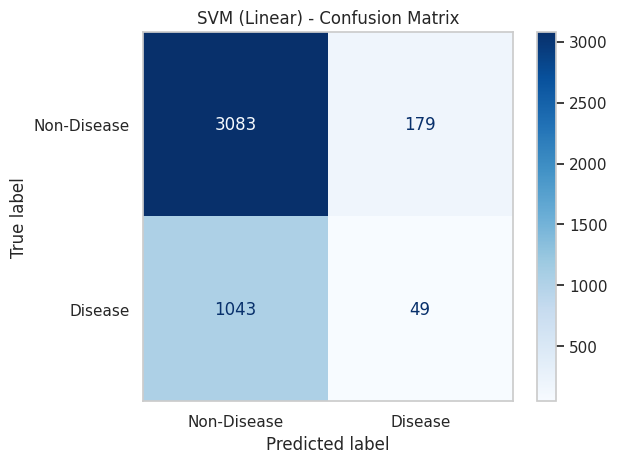

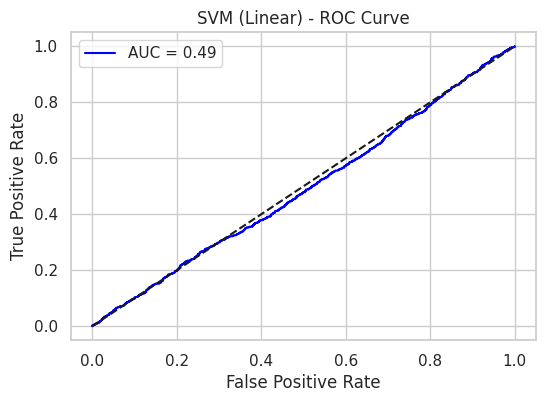

In [ ]:
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=SEED)
_, _ = evaluate_model("SVM (Linear)", svm_model, X_train_scaled, X_test_scaled, y_train, y_test, results=results)

# **KNN**


📌 KNN Evaluation:
Accuracy : 0.7074 | Precision: 0.2605 | Recall: 0.0907 | F1 Score: 0.1345 | AUC: 0.5075

Classification Report:
               precision    recall  f1-score   support

 Non-Disease       0.75      0.91      0.82      3262
     Disease       0.26      0.09      0.13      1092

    accuracy                           0.71      4354
   macro avg       0.51      0.50      0.48      4354
weighted avg       0.63      0.71      0.65      4354



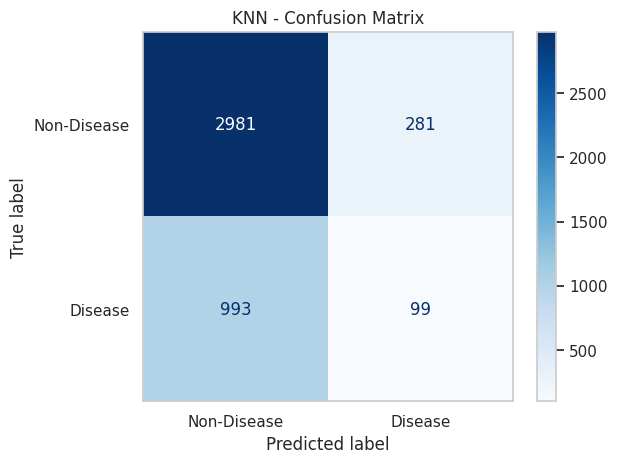

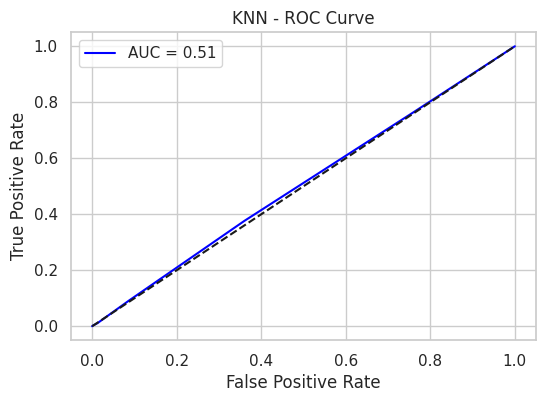

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
_, _ = evaluate_model("KNN", knn_model, X_train_scaled, X_test_scaled, y_train, y_test, results=results)

In [ ]:
import pandas as pd

# Create and sort the DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="AUC", ascending=False).reset_index(drop=True)

# Display in styled format
print("📊 Model Performance Comparison:")
display(results_df.style.background_gradient(cmap='Blues').format(precision=3))

📊 Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree,0.518,0.261,0.503,0.343,0.516
1,Random Forest,0.747,0.250,0.005,0.009,0.509
2,KNN,0.707,0.261,0.091,0.135,0.507
3,SVM (Linear),0.719,0.215,0.045,0.074,0.491


# **Late Fusion**

# **Implement Late Fusion**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)

# **Check Shape of Probability Arrays**

y_rf_proba: From RandomForestClassifier.predict_proba(Xf_test)[:, 1]

y_prob: From evaluate_model(model, test_loader) return (LSTM probs)

yf_test: Ground-truth labels used for Xf_test in Framingham

In [ ]:
n = min(len(y_best_rf_proba), len(y_lstm_proba), len(y_ptbxl_proba), len(yf_test))

In [ ]:
# Trim all to same length
proba_rf = y_best_rf_proba[:n]
proba_lstm = y_lstm_proba[:n]
proba_ptbxl = y_ptbxl_proba[:n]
y_true_fused = yf_test[:n]

In [ ]:
# ✅ Step 2: Average probabilities (equal weighting)
fused_proba = (proba_rf + proba_lstm + proba_ptbxl) / 3
fused_pred = (fused_proba >= 0.5).astype(int)

In [ ]:
# ✅ Step 3: Evaluate fusion performance
print("Late Fusion Evaluation")
print("Accuracy :", accuracy_score(y_true_fused, fused_pred))
print("Precision:", precision_score(y_true_fused, fused_pred, zero_division=0))
print("Recall   :", recall_score(y_true_fused, fused_pred))
print("F1 Score :", f1_score(y_true_fused, fused_pred))
print("AUC Score:", roc_auc_score(y_true_fused, fused_proba))
print("\nClassification Report:\n", classification_report(y_true_fused, fused_pred))

Late Fusion Evaluation
Accuracy : 0.79125
Precision: 0.1917808219178082
Recall   : 0.11475409836065574
F1 Score : 0.14358974358974358
AUC Score: 0.5104695584892887

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       678
           1       0.19      0.11      0.14       122

    accuracy                           0.79       800
   macro avg       0.52      0.51      0.51       800
weighted avg       0.75      0.79      0.77       800



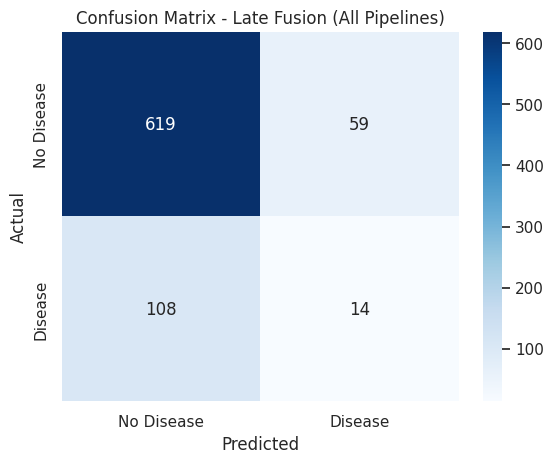

In [ ]:
# ✅ Step 4: Confusion Matrix
cm = confusion_matrix(y_true_fused, fused_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - Late Fusion (All Pipelines)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

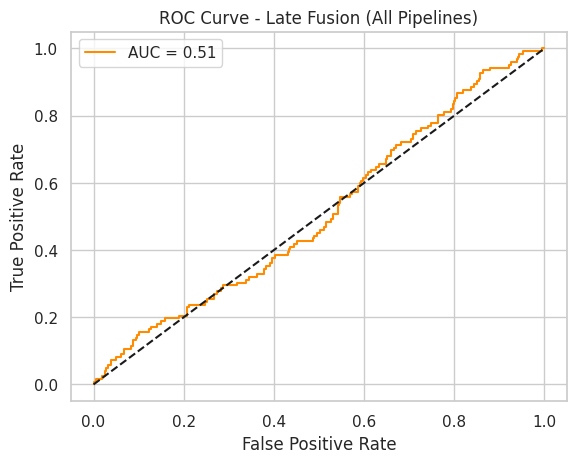

In [ ]:
# ✅ Step 5: ROC Curve
fpr, tpr, _ = roc_curve(y_true_fused, fused_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true_fused, fused_proba):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Late Fusion (All Pipelines)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()